In [1]:
import os
#os.chdir("/content/drive/MyDrive/Diplomado_2024_01/Curso_Introduccion/Python")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector

import statsmodels.api as sms

from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pd.options.display.float_format = '{:.6f}'.format
pd.set_option("display.max_columns",1000)
import warnings
warnings.filterwarnings("ignore")

import utils


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

## **Importar Datos**

In [4]:
df=pd.read_csv("Insumos/BaseModelo.csv")

In [5]:
x_cat=pd.read_csv("Insumos/predictores_cat.csv")["Variable"].tolist()
x_cat

['PAY_0_Retraso_2_Mes',
 'PAY_2_Retraso_2_Mes',
 'PAY_3_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_0_Retraso_1_Mes',
 'PAY_2_Retraso_3_Mes',
 'PAY_3_Retraso_3_Mes',
 'PAY_4_Retraso_3_Mes',
 'PAY_4_Retraso_7_Mes',
 'PAY_0_Retraso_4_Mes',
 'PAY_4_Retraso_4_Mes',
 'PAY_3_Retraso_4_Mes',
 'PAY_3_Retraso_7_Mes',
 'Educacion_Posgrado',
 'PAY_2_Retraso_4_Mes',
 'Genero_Masculino',
 'Educacion_Secundaria',
 'PAY_2_Retraso_5_Mes',
 'PAY_3_Retraso_6_Mes',
 'PAY_2_Retraso_6_Mes',
 'PAY_4_Retraso_5_Mes',
 'PAY_2_Retraso_7_Mes',
 'PAY_0_Retraso_7_Mes',
 'PAY_3_Retraso_5_Mes',
 'PAY_0_Retraso_8_Mes',
 'EstadoCivil_Soltero',
 'Educacion_Universidad',
 'PAY_0_Retraso_5_Mes',
 'PAY_0_Retraso_6_Mes']

In [6]:
x_num=pd.read_csv("Insumos/predictores_numericos.csv")["Variable"].tolist()
x_num

['MontoCredito',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'BILL_AMT1',
 'Edad']

In [7]:
df

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes,Mora
0,20000.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,24.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,120000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,90000.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,50000.000000,2000.000000,2019.000000,1100.000000,1200.000000,1069.000000,1000.000000,46990.000000,37.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,50000.000000,2000.000000,36681.000000,9000.000000,10000.000000,689.000000,679.000000,8617.000000,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000000,8500.000000,20000.000000,3047.000000,5003.000000,5000.000000,1000.000000,188948.000000,39.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000.000000,1837.000000,3526.000000,129.000000,8998.000000,0.000000,0.000000,1683.000000,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
29997,30000.000000,0.000000,0.000000,4200.000000,22000.000000,2000.000000,3100.000000,3565.000000,37.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1
29998,80000.000000,85900.000000,3409.000000,1926.000000,1178.000000,52964.000000,1804.000000,-1645.000000,41.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1




# **Modelado**

Los términos inferencia y predicción describen tareas en las que aprendemos de los datos de manera supervisada para encontrar un modelo que describa la relación entre las variables independientes y el resultado. Sin embargo, la inferencia y la predicción divergen cuando se trata del uso del modelo resultante:

* Inferencia: use el modelo para aprender sobre el proceso de generación de datos.
* Predicción: utilice el modelo para predecir los resultados de nuevos puntos de datostos

# **Inferencia:**

In [8]:
Predictores=x_num+x_cat

In [9]:
X=df[Predictores]

In [10]:
X

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
0,20000.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,24.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,120000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,90000.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,50000.000000,2000.000000,2019.000000,1100.000000,1200.000000,1069.000000,1000.000000,46990.000000,37.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,50000.000000,2000.000000,36681.000000,9000.000000,10000.000000,689.000000,679.000000,8617.000000,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000000,8500.000000,20000.000000,3047.000000,5003.000000,5000.000000,1000.000000,188948.000000,39.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000.000000,1837.000000,3526.000000,129.000000,8998.000000,0.000000,0.000000,1683.000000,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
29997,30000.000000,0.000000,0.000000,4200.000000,22000.000000,2000.000000,3100.000000,3565.000000,37.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
29998,80000.000000,85900.000000,3409.000000,1926.000000,1178.000000,52964.000000,1804.000000,-1645.000000,41.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
y=df["Mora"]

## **Sesgo**

In [12]:
y.value_counts(normalize=True)

Mora
0   0.778800
1   0.221200
Name: proportion, dtype: float64

## **División Train- Test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar la aproximación de sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de prueba.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123, stratify=y)

In [14]:
y_train.value_counts(normalize=True)

Mora
0   0.778810
1   0.221190
Name: proportion, dtype: float64

In [15]:
y_test.value_counts(normalize=True)

Mora
0   0.778778
1   0.221222
Name: proportion, dtype: float64

## **Ajuste Regresión Logística**

La regresión logística es un método estadístico que trata de modelar la probabilidad de una variable cualitativa binaria (dos posibles valores) en función de una o más variables independientes. La principal aplicación de la regresión logística es la creación de modelos de clasificación binaria.


![image.png](attachment:f1d24d6a-3ea0-49eb-901d-7dc36d71bfa8.png)

In [16]:
x_train_1=sms.add_constant(x_train)
x_test_1=sms.add_constant(x_test)
x_train_1

,const,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
14451,1.000000,20000.000000,390.000000,780.000000,780.000000,780.000000,390.000000,780.000000,2912.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
18392,1.000000,230000.000000,237.000000,586.000000,1249.000000,12511.000000,0.000000,0.000000,160.000000,24.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
24955,1.000000,360000.000000,238.000000,0.000000,200.000000,3730.000000,0.000000,0.000000,0.000000,31.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
7162,1.000000,90000.000000,5000.000000,4300.000000,3500.000000,3500.000000,3700.000000,3100.000000,89947.000000,26.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12125,1.000000,20000.000000,0.000000,1118.000000,694.000000,412.000000,0.000000,300.000000,6345.000000,29.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,1.000000,280000.000000,0.000000,8000.000000,5000.000000,6000.000000,10000.000000,5000.000000,238094.000000,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3228,1.000000,50000.000000,2228.000000,2500.000000,1457.000000,1660.000000,1300.000000,1340.000000,43721.000000,26.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23477,1.000000,100000.000000,0.000000,1850.000000,1500.000000,3200.000000,0.000000,1500.000000,31708.000000,30.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22177,1.000000,310000.000000,1261.000000,1261.000000,0.000000,1651.000000,390.000000,390.000000,1261.000000,27.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [17]:
## Entranamiento

In [18]:
Modelo_Logit=sms.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [19]:
Modelo_Logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: -0.312    
Dependent Variable:  Mora             AIC:              29192.1816
Date:                2024-07-22 19:18 BIC:              29510.2727
No. Observations:    21000            Log-Likelihood:   -14556.   
Df Model:            39               LL-Null:          -11097.   
Df Residuals:        20960            LLR p-value:      1.0000    
Converged:           0.0000           Scale:            1.0000    
Method:              MLE                                          
------------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
------------------------------------------------------------------
const                 0.0000   0.2228 0.0000 1.0000 -0.4367 0.4367
MontoCredito          0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT1              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT2              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT4              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT3              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT5              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT6              0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
BILL_AMT1             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
Edad                  0.0000   0.0018 0.0000 1.0000 -0.0035 0.0035
PAY_0_Retraso_2_Mes   0.0000   0.0604 0.0000 1.0000 -0.1183 0.1183
PAY_2_Retraso_2_Mes   0.0000   0.0622 0.0000 1.0000 -0.1219 0.1219
PAY_3_Retraso_2_Mes   0.0000   0.0591 0.0000 1.0000 -0.1158 0.1158
PAY_4_Retraso_2_Mes   0.0000   0.0577 0.0000 1.0000 -0.1130 0.1130
PAY_0_Retraso_3_Mes   0.0000   0.1499 0.0000 1.0000 -0.2939 0.2939
PAY_0_Retraso_1_Mes   0.0000   0.0503 0.0000 1.0000 -0.0986 0.0986
PAY_2_Retraso_3_Mes   0.0000   0.1559 0.0000 1.0000 -0.3055 0.3055
PAY_3_Retraso_3_Mes   0.0000   0.2004 0.0000 1.0000 -0.3928 0.3928
PAY_4_Retraso_3_Mes   0.0000   0.2093 0.0000 1.0000 -0.4101 0.4101
PAY_4_Retraso_7_Mes   0.0000   0.4579 0.0000 1.0000 -0.8975 0.8975
PAY_0_Retraso_4_Mes   0.0000   0.3055 0.0000 1.0000 -0.5987 0.5987
PAY_4_Retraso_4_Mes   0.0000   0.3797 0.0000 1.0000 -0.7442 0.7442
PAY_3_Retraso_4_Mes   0.0000   0.4397 0.0000 1.0000 -0.8617 0.8617
PAY_3_Retraso_7_Mes   0.0000   0.6253 0.0000 1.0000 -1.2255 1.2255
Educacion_Posgrado    0.0000   0.2122 0.0000 1.0000 -0.4160 0.4160
PAY_2_Retraso_4_Mes   0.0000   0.3384 0.0000 1.0000 -0.6632 0.6632
Genero_Masculino      0.0000   0.0286 0.0000 1.0000 -0.0560 0.0560
Educacion_Secundaria  0.0000   0.2143 0.0000 1.0000 -0.4199 0.4199
PAY_2_Retraso_5_Mes   0.0000   0.7656 0.0000 1.0000 -1.5006 1.5006
PAY_3_Retraso_6_Mes   0.0000   1.6595 0.0000 1.0000 -3.2526 3.2526
PAY_2_Retraso_6_Mes   0.0000   1.6653 0.0000 1.0000 -3.2639 3.2639
PAY_4_Retraso_5_Mes   0.0000   0.7185 0.0000 1.0000 -1.4083 1.4083
PAY_2_Retraso_7_Mes   0.0000   1.7217 0.0000 1.0000 -3.3745 3.3745
PAY_0_Retraso_7_Mes   0.0000   1.6766 0.0000 1.0000 -3.2861 3.2861
PAY_3_Retraso_5_Mes   0.0000   0.9139 0.0000 1.0000 -1.7912 1.7912
PAY_0_Retraso_8_Mes   0.0000   1.5550 0.0000 1.0000 -3.0477 3.0477
EstadoCivil_Soltero   0.0000   0.0317 0.0000 1.0000 -0.0622 0.0622
Educacion_Universidad 0.0000   0.2121 0.0000 1.0000 -0.4157 0.4157
PAY_0_Retraso_5_Mes   0.0000   0.5685 0.0000 1.0000 -1.1142 1.1142
PAY_0_Retraso_6_Mes   0.0000   1.0087 0.0000 1.0000 -1.9771 1.9771
==================================================================

"""

## **Supuesto de los Modelos Lineales**
* No multicolinealidad: Se espera que las variables predictoras no estén altamente correlacionadas entre sí, ya que la multicolinealidad puede dificultar la interpretación de los coeficientes y hacer que las estimaciones sean inestables.


In [20]:
x_train_1.shape

(21000, 40)

In [21]:
x_train

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
14451,20000.000000,390.000000,780.000000,780.000000,780.000000,390.000000,780.000000,2912.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
18392,230000.000000,237.000000,586.000000,1249.000000,12511.000000,0.000000,0.000000,160.000000,24.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
24955,360000.000000,238.000000,0.000000,200.000000,3730.000000,0.000000,0.000000,0.000000,31.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
7162,90000.000000,5000.000000,4300.000000,3500.000000,3500.000000,3700.000000,3100.000000,89947.000000,26.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12125,20000.000000,0.000000,1118.000000,694.000000,412.000000,0.000000,300.000000,6345.000000,29.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,280000.000000,0.000000,8000.000000,5000.000000,6000.000000,10000.000000,5000.000000,238094.000000,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3228,50000.000000,2228.000000,2500.000000,1457.000000,1660.000000,1300.000000,1340.000000,43721.000000,26.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23477,100000.000000,0.000000,1850.000000,1500.000000,3200.000000,0.000000,1500.000000,31708.000000,30.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22177,310000.000000,1261.000000,1261.000000,0.000000,1651.000000,390.000000,390.000000,1261.000000,27.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## **El Análisis de VIF (Variance Inflation Factor, por sus siglas en inglés)**

La multicolinealidad entre variables independientes en un modelo de regresión. La multicolinealidad es una situación en la que dos o más variables independientes en un modelo de regresión están altamente correlacionadas entre sí, lo que puede causar problemas al estimar los coeficientes de regresión y dificultar la interpretación de los resultados.

El VIF mide cuánto se infla la varianza de los coeficientes de regresión debido a la multicolinealidad. Un VIF alto indica una alta multicolinealidad y sugiere que una variable es predecible a partir de las otras en el modelo. Generalmente, se considera que un VIF mayor a 10 o 5 indica multicolinealidad problemática

In [22]:
p_valores=Modelo_Logit.pvalues
len(p_valores)

40

In [23]:
variables_significativas=p_valores[p_valores<0.05].index
variables_significativas

Index([], dtype='object')

In [24]:
ResultadoVif=pd.DataFrame()
ResultadoVif["Variable"]=x_train.columns
ResultadoVif["Vif"]=[variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns)) ]

In [25]:
EliminarPorVif=ResultadoVif["Variable"][ResultadoVif["Vif"]>=4].tolist()

In [26]:
EliminarPorVif

['Edad',
 'Educacion_Posgrado',
 'Educacion_Secundaria',
 'PAY_3_Retraso_6_Mes',
 'PAY_2_Retraso_6_Mes',
 'PAY_2_Retraso_7_Mes',
 'PAY_0_Retraso_7_Mes',
 'PAY_0_Retraso_8_Mes',
 'Educacion_Universidad']

In [27]:
x_train_1.drop(columns=EliminarPorVif,inplace=True)
x_test_1.drop(columns=EliminarPorVif,inplace=True)

In [28]:
Modelo_Logit_2=sms.Logit(endog=y_train,exog=x_train_1).fit(method="bfgs")

         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3


In [29]:
Modelo_Logit_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: -0.312    
Dependent Variable: Mora             AIC:              29174.1816
Date:               2024-07-22 19:18 BIC:              29420.7022
No. Observations:   21000            Log-Likelihood:   -14556.   
Df Model:           30               LL-Null:          -11097.   
Df Residuals:       20969            LLR p-value:      1.0000    
Converged:          0.0000           Scale:            1.0000    
Method:             MLE                                          
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
const                0.0000   0.0327 0.0000 1.0000 -0.0641 0.0641
MontoCredito         0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT1             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT2             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT4             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT3             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT5             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_AMT6             0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
BILL_AMT1            0.0000   0.0000 0.0000 1.0000 -0.0000 0.0000
PAY_0_Retraso_2_Mes  0.0000   0.0603 0.0000 1.0000 -0.1183 0.1183
PAY_2_Retraso_2_Mes  0.0000   0.0621 0.0000 1.0000 -0.1217 0.1217
PAY_3_Retraso_2_Mes  0.0000   0.0590 0.0000 1.0000 -0.1155 0.1155
PAY_4_Retraso_2_Mes  0.0000   0.0576 0.0000 1.0000 -0.1129 0.1129
PAY_0_Retraso_3_Mes  0.0000   0.1494 0.0000 1.0000 -0.2928 0.2928
PAY_0_Retraso_1_Mes  0.0000   0.0502 0.0000 1.0000 -0.0984 0.0984
PAY_2_Retraso_3_Mes  0.0000   0.1554 0.0000 1.0000 -0.3045 0.3045
PAY_3_Retraso_3_Mes  0.0000   0.1999 0.0000 1.0000 -0.3919 0.3919
PAY_4_Retraso_3_Mes  0.0000   0.2086 0.0000 1.0000 -0.4089 0.4089
PAY_4_Retraso_7_Mes  0.0000   0.4508 0.0000 1.0000 -0.8835 0.8835
PAY_0_Retraso_4_Mes  0.0000   0.3054 0.0000 1.0000 -0.5986 0.5986
PAY_4_Retraso_4_Mes  0.0000   0.3666 0.0000 1.0000 -0.7185 0.7185
PAY_3_Retraso_4_Mes  0.0000   0.4250 0.0000 1.0000 -0.8331 0.8331
PAY_3_Retraso_7_Mes  0.0000   0.6132 0.0000 1.0000 -1.2018 1.2018
PAY_2_Retraso_4_Mes  0.0000   0.3363 0.0000 1.0000 -0.6591 0.6591
Genero_Masculino     0.0000   0.0283 0.0000 1.0000 -0.0555 0.0555
PAY_2_Retraso_5_Mes  0.0000   0.7480 0.0000 1.0000 -1.4661 1.4661
PAY_4_Retraso_5_Mes  0.0000   0.4104 0.0000 1.0000 -0.8043 0.8043
PAY_3_Retraso_5_Mes  0.0000   0.6042 0.0000 1.0000 -1.1842 1.1842
EstadoCivil_Soltero  0.0000   0.0278 0.0000 1.0000 -0.0545 0.0545
PAY_0_Retraso_5_Mes  0.0000   0.5598 0.0000 1.0000 -1.0973 1.0973
PAY_0_Retraso_6_Mes  0.0000   0.9775 0.0000 1.0000 -1.9160 1.9160
=================================================================

"""

In [30]:
p_valores=Modelo_Logit_2.pvalues
len(p_valores)
variables_significativas=p_valores[p_valores<0.05].index
variables_significativas

Index([], dtype='object')

In [31]:
ResultadoVif=pd.DataFrame()
ResultadoVif["Variable"]=x_train_1.columns
ResultadoVif["Vif"]=[variance_inflation_factor(x_train_1.values,i) for i in range(len(x_train_1.columns)) ]

## **Eliminación Automática de Variables**

La eliminación automática de variables en un modelo de regresión, ya sea hacia adelante o hacia atrás, es un enfoque para seleccionar un subconjunto óptimo de características predictoras en función de ciertos criterios. Estos métodos ayudan a simplificar el modelo y reducir la multicolinealidad, el sobreajuste y el ruido, lo que puede mejorar la capacidad predictiva del modelo.

## **Forward Selection**

Eliminación hacia adelante (Forward Selection): En este enfoque, comienzas con un modelo vacío (sin variables predictoras) y luego iterativamente agregas una variable a la vez. En cada paso, seleccionas la variable que proporciona la mejora más significativa en el ajuste del modelo (por ejemplo, reduce el error residual o aumenta el estadístico F). Continúas agregando variables hasta que no haya más mejoras significativas. Esto se hace generalmente con la ayuda de criterios estadísticos, como el valor p o el valor F

## **Backward Elimination**

Eliminación hacia atrás (Backward Elimination): En este enfoque, comienzas con un modelo que incluye todas las variables predictoras y luego, en cada paso, eliminas la variable que menos contribuye al ajuste del modelo. Continúas eliminando variables hasta que no haya más variables que puedan eliminarse sin empeorar significativamente el modelo

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
  .

In [32]:
modelo_base=LogisticRegression()

In [33]:
#Selector=SequentialFeatureSelector(modelo_base,direction="backward") #forward
#Selector.fit(x_train,y_train)

In [34]:
#x_train_1.columns[Selector.get_support()].tolist()

In [35]:
x_test.head()

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
45,210000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
18762,420000.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,84363.000000,52898.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9341,70000.000000,3400.000000,2310.000000,1600.000000,1600.000000,1700.000000,2000.000000,67306.000000,35.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
21814,180000.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
25950,410000.000000,388.000000,388.000000,110345.000000,388.000000,8000.000000,4200.000000,388.000000,32.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
VariablesForward=['const',
 'PAY_0_Retraso_2_Mes',
 'PAY_2_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_0_Retraso_1_Mes',
 'PAY_2_Retraso_3_Mes',
 'PAY_4_Retraso_3_Mes',
 'PAY_0_Retraso_4_Mes',
 'Edad',
 'PAY_3_Retraso_4_Mes',
 'Educacion_Universidad',
 'PAY_0_Retraso_5_Mes',"EstadoCivil_Soltero"]

VariablesBackward=['const',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT4',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_0_Retraso_2_Mes',
 'PAY_4_Retraso_2_Mes',
 'PAY_0_Retraso_3_Mes',
 'PAY_4_Retraso_7_Mes',
 'PAY_4_Retraso_4_Mes',
 'PAY_3_Retraso_4_Mes',
 'PAY_2_Retraso_4_Mes',
 'PAY_2_Retraso_5_Mes',
 'PAY_3_Retraso_5_Mes',
 'PAY_0_Retraso_5_Mes']

In [37]:
x_train_2=sms.add_constant(x_train)[VariablesForward]
x_test_2=sms.add_constant(x_test)[VariablesForward]

In [38]:
Modelo_Logit_3=sms.Logit(endog=y_train,exog=x_train_2).fit(method="bfgs")

         Current function value: 0.447864
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


In [39]:
Modelo_Logit_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Pseudo R-squared:  0.152     
Dependent Variable:    Mora              AIC:               18838.2980
Date:                  2024-07-22 19:18  BIC:               18949.6299
No. Observations:      21000             Log-Likelihood:    -9405.1   
Df Model:              13                LL-Null:           -11097.   
Df Residuals:          20986             LLR p-value:       0.0000    
Converged:             0.0000            Scale:             1.0000    
Method:                MLE                                            
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -2.0826   0.0994 -20.9434 0.0000 -2.2775 -1.8877
PAY_0_Retraso_2_Mes    2.0170   0.0650  31.0399 0.0000  1.8896  2.1443
PAY_2_Retraso_2_Mes    0.5323   0.0621   8.5704 0.0000  0.4106  0.6540
PAY_4_Retraso_2_Mes    0.7738   0.0563  13.7341 0.0000  0.6634  0.8842
PAY_0_Retraso_3_Mes    1.4225   0.1523   9.3379 0.0000  1.1239  1.7211
PAY_0_Retraso_1_Mes    0.8203   0.0568  14.4357 0.0000  0.7089  0.9317
PAY_2_Retraso_3_Mes    1.1164   0.1669   6.6891 0.0000  0.7893  1.4436
PAY_4_Retraso_3_Mes    0.6079   0.2205   2.7573 0.0058  0.1758  1.0401
PAY_0_Retraso_4_Mes    0.5106   0.3120   1.6365 0.1017 -0.1009  1.1221
Edad                   0.0061   0.0022   2.7267 0.0064  0.0017  0.0105
PAY_3_Retraso_4_Mes    0.2409   0.3236   0.7443 0.4567 -0.3934  0.8752
Educacion_Universidad  0.0374   0.0373   1.0032 0.3158 -0.0357  0.1105
PAY_0_Retraso_5_Mes    0.0885   0.5661   0.1563 0.8758 -1.0210  1.1980
EstadoCivil_Soltero   -0.0635   0.0419  -1.5158 0.1296 -0.1457  0.0186
======================================================================

"""

In [40]:
p_valores=Modelo_Logit_3.pvalues
print(len(p_valores))
variables_significativas=p_valores[p_valores<0.05].index
len(variables_significativas)

14


9

In [41]:
coefientes=Modelo_Logit_3.params
odds_ratios=np.exp(coefientes)
odds_ratios

const                   0.124611
PAY_0_Retraso_2_Mes     7.515501
PAY_2_Retraso_2_Mes     1.702822
PAY_4_Retraso_2_Mes     2.167980
PAY_0_Retraso_3_Mes     4.147407
PAY_0_Retraso_1_Mes     2.271143
PAY_2_Retraso_3_Mes     3.053956
PAY_4_Retraso_3_Mes     1.836634
PAY_0_Retraso_4_Mes     1.666252
Edad                    1.006118
PAY_3_Retraso_4_Mes     1.272388
Educacion_Universidad   1.038127
PAY_0_Retraso_5_Mes     1.092508
EstadoCivil_Soltero     0.938431
dtype: float64

In [42]:
# 0=Septiembre, 2:Agosto

* PAY_0_Retraso_2_Mes	1.9962

* Coeficiente (Coef.): Indica la dirección y magnitud del efecto de la variable predictora en la variable de respuesta. Un coeficiente positivo sugiere que un aumento en la variable predictora aumenta la probabilidad del evento de interés, mientras que un coeficiente negativo sugiere lo contrario.

* Los Clientes que acorte del mes de Septiembre, tenian 2 meses de Mora, se les aumenta los odds (ratios de logaritmo de las probabilidades) en 1.99  en comparación a los que no presentan Mora de 2 meses en Septiembre; La variable tiene un p valor de 0.0000	, menor a 0.05, por lo tanto se concluye que es  estadisticamnete significativa, de lo contrario no podemos concluir nada sobre ella.

exp(coef)

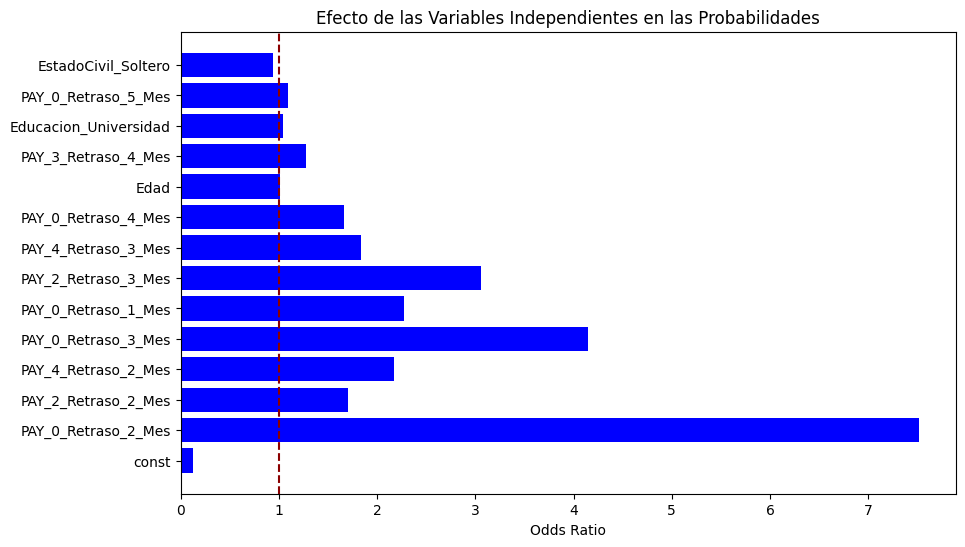

In [43]:
Variables=odds_ratios.index.tolist()
exp=odds_ratios.values.tolist()
plt.figure(figsize=(10, 6))
plt.barh(Variables, exp, color='blue')
plt.axvline(x=1,color="darkred",linestyle="--")
plt.xlabel('Odds Ratio')
plt.title('Efecto de las Variables Independientes en las Probabilidades');

Un odds ratio mayor a 1 indica un aumento en la probabilidad del evento, mientras que un odds ratio menor a 1 indica una disminución en la probabilidad.

![image.png](attachment:d8360ee6-f479-4bb7-b601-0c68246b94f3.png)

In [44]:
(1-0.938431)*100

6.1568999999999985

In [45]:
 (7.515501-1)

6.515501

In [46]:
( 1.006118-1)*100

0.6118000000000068

## **¿Poder Predictivo?**

In [47]:
x_train_2

,const,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_0_Retraso_4_Mes,Edad,PAY_3_Retraso_4_Mes,Educacion_Universidad,PAY_0_Retraso_5_Mes,EstadoCivil_Soltero
14451,1.000000,0,0,0,0,0,0,0,0,52.000000,0,0,0,0
18392,1.000000,0,0,0,0,0,0,0,0,24.000000,0,1,0,1
24955,1.000000,0,0,0,0,1,0,0,0,31.000000,0,0,0,1
7162,1.000000,1,0,0,0,0,0,0,0,26.000000,0,1,0,0
12125,1.000000,0,1,0,0,1,0,0,0,29.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,1.000000,0,1,0,0,1,0,0,0,40.000000,0,1,0,0
3228,1.000000,0,0,0,0,0,0,0,0,26.000000,0,1,0,0
23477,1.000000,0,1,0,0,1,0,0,0,30.000000,0,1,0,1
22177,1.000000,0,0,0,0,0,0,0,0,27.000000,0,1,0,1


In [48]:
y_train

14451    0
18392    1
24955    0
7162     0
12125    0
        ..
27165    0
3228     0
23477    1
22177    1
13416    0
Name: Mora, Length: 21000, dtype: int64

## **Predicciones Train**

In [49]:
Probabilidades_Train=Modelo_Logit_3.predict(exog=x_train_2)

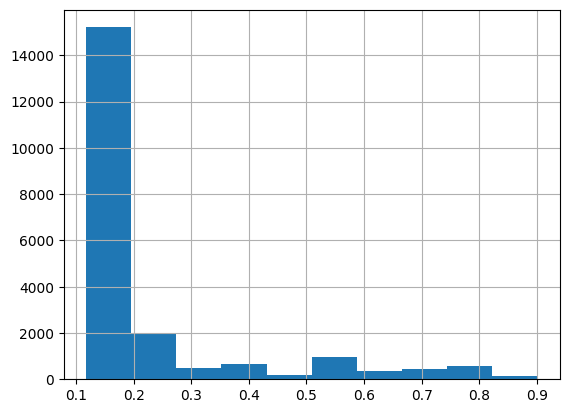

In [50]:
Probabilidades_Train.hist();

In [51]:
Predicciones_Train=np.where(Probabilidades_Train<0.5,0,1)

In [52]:
pd.Series(Predicciones_Train).value_counts()

0    18418
1     2582
Name: count, dtype: int64

In [53]:
Resultado=pd.DataFrame({"Predicciones":Predicciones_Train,"Realidad":y_train,"Prob":Probabilidades_Train})

In [54]:
pd.crosstab(Resultado["Predicciones"],Resultado["Realidad"])

Realidad,0,1
Predicciones,,
0,15475,2943
1,880,1702


## **Evaluación en Entranamiento**

La matriz de confusión
La matriz de confusión es una herramienta fundamental en el campo de la clasificación en aprendizaje automático y estadísticas. Se utiliza para evaluar el rendimiento de un modelo de clasificación al comparar las predicciones del modelo con los valores reales o etiquetas de las observaciones en un conjunto de datos. La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas que realiza un modelo, y es especialmente útil cuando se trabaja con problemas de clasificación binaria (dos clases) o clasificación multiclase (más de dos clases).

La matriz de confusión se compone de cuatro elementos principales:

Verdaderos Positivos (TP - True Positives): Representa el número de observaciones que el modelo predijo correctamente como positivas (clase positiva) cuando en realidad eran positivas.

Falsos Negativos (FN - False Negatives): Indica el número de observaciones que el modelo predijo incorrectamente como negativas (clase negativa) cuando en realidad eran positivas.

Falsos Positivos (FP - False Positives): Muestra el número de observaciones que el modelo predijo incorrectamente como positivas cuando en realidad eran negativas.

Verdaderos Negativos (TN - True Negatives): Representa la cantidad de observaciones que el modelo predijo correctamente como negativas cuando en realidad eran negativas.

**Trade - off Sesgo - Varianza**

Accuracy: 0.817952380952381
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.66      0.37      0.47      4645

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.68     21000
weighted avg       0.80      0.82      0.80     21000



Predicciones,0,1,All
Realidad,,,
0,15475,880,16355
1,2943,1702,4645
All,18418,2582,21000


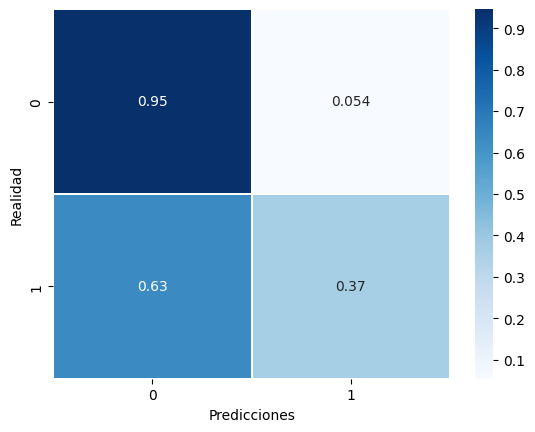

In [55]:
utils.MetricasMatrizConfusion(y=y_train,Modelo=Modelo_Logit_3,X=x_train_2,tipo="Logit")

In [56]:
Accuracy =metrics.accuracy_score(y_train,Predicciones_Train)
print(f'Accuracy: {Accuracy}')
Reporte=metrics.classification_report(y_train,Predicciones_Train)
print(f'Reporte : {Reporte}')

Accuracy: 0.817952380952381
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89     16355
           1       0.66      0.37      0.47      4645

    accuracy                           0.82     21000
   macro avg       0.75      0.66      0.68     21000
weighted avg       0.80      0.82      0.80     21000



## **Curva ROC**

![image.png](attachment:d7a40ea1-9fe5-4a84-acf7-f69dd2edafce.png)

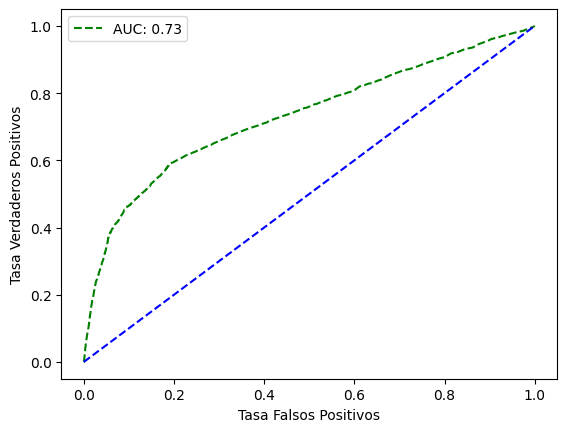

0.7307397921322488

In [57]:
utils.curva_roc(y=y_train,Modelo=Modelo_Logit_3,X=x_train_2,tipo="Logit")

## **Test**

Accuracy: 0.8207777777777778
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.37      0.48      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Predicciones,0,1,All
Realidad,,,
0,6655,354,7009
1,1259,732,1991
All,7914,1086,9000


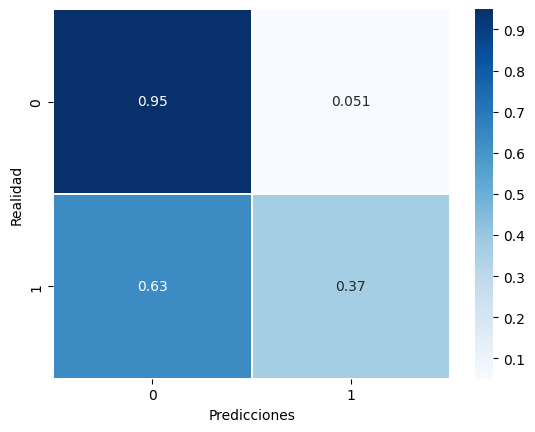

In [58]:
utils.MetricasMatrizConfusion(y=y_test,Modelo=Modelo_Logit_3,X=x_test_2,tipo="Logit")

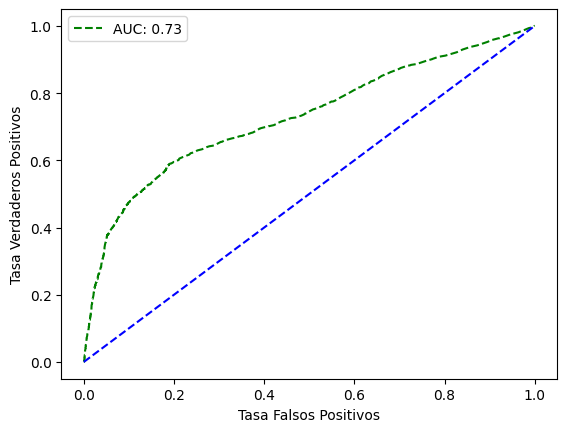

0.7288930878065291

In [59]:
utils.curva_roc(y=y_test,Modelo=Modelo_Logit_3,X=x_test_2,tipo="Logit")

## **Modelos Machine Learning (Poder Predictivo)**

* https://pycaret.org/

PyCaret es una biblioteca de código abierto de aprendizaje automático (machine learning) para Python que facilita y agiliza el proceso de desarrollo y experimentación con modelos de aprendizaje automático. Fue desarrollado para simplificar tareas comunes en el flujo de trabajo de aprendizaje automático, como la preparación de datos, la selección de características, la creación de modelos, la evaluación y comparación de modelos, y la interpretación de resultados.

Las características principales de PyCaret son:

Interfaz sencilla: PyCaret proporciona una interfaz de línea de comandos simple e intuitiva, lo que lo hace accesible incluso para usuarios nuevos en aprendizaje automático.

Automatización del flujo de trabajo: PyCaret automatiza muchas de las tareas repetitivas y tediosas que generalmente se realizan en el proceso de desarrollo de modelos, lo que permite a los usuarios centrarse más en la experimentación y la iteración rápida.

Soporte para múltiples bibliotecas de aprendizaje automático: PyCaret es compatible con varias bibliotecas populares de aprendizaje automático, como scikit-learn, XGBoost, LightGBM, CatBoost, etc. Esto permite a los usuarios comparar fácilmente diferentes algoritmos sin necesidad de escribir mucho código.

Funciones de preprocesamiento de datos: PyCaret ofrece funcionalidades para la preparación y limpieza de datos, incluyendo manejo de valores faltantes, codificación de variables categóricas, y más.

Comparación de modelos: PyCaret permite comparar rápidamente el rendimiento de varios modelos utilizando diferentes métricas, lo que ayuda a seleccionar el mejor modelo para un problema en particular.

Sintonización automática de hiperparámetros: PyCaret puede realizar automáticamente la búsqueda de hiperparámetros para optimizar los modelos, lo que reduce la necesidad de ajustar manualmente los hiperparámetros.

Interpretación de modelos: PyCaret ofrece funciones para interpretar y visualizar los modelos entrenados, lo que facilita la comprensión de cómo funcionan y qué características son más importantes para la predicción.

En general, PyCaret es una excelente herramienta para acelerar y simplificar el proceso de desarrollo de modelos de aprendizaje automático, lo que lo hace especialmente útil para usuarios que deseen experimentar con diferentes algoritmos y técnicas de manera eficiente. Sin embargo, es importante tener en cuenta que, como en cualquier biblioteca de alto nivel, la flexibilidad y control sobre el flujo de trabajo pueden ser más limitados que al utilizar bibliotecas de nivel más bajo como scikit-learn.

In [60]:
#!pip install pycaret[full]

In [61]:
from pycaret.classification import *

# **Arbol de Clasificación**

In [62]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

**Entrenamiento Simple**

In [63]:
Arbol_Simple=DecisionTreeClassifier(random_state=123)## Libertad crezca
Arbol_Simple.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

* criterion: Especifica la función para medir la calidad de una división. Puede ser "gini" para medir la impureza de Gini o "entropy" para medir la ganancia de información. El valor predeterminado es "gini".

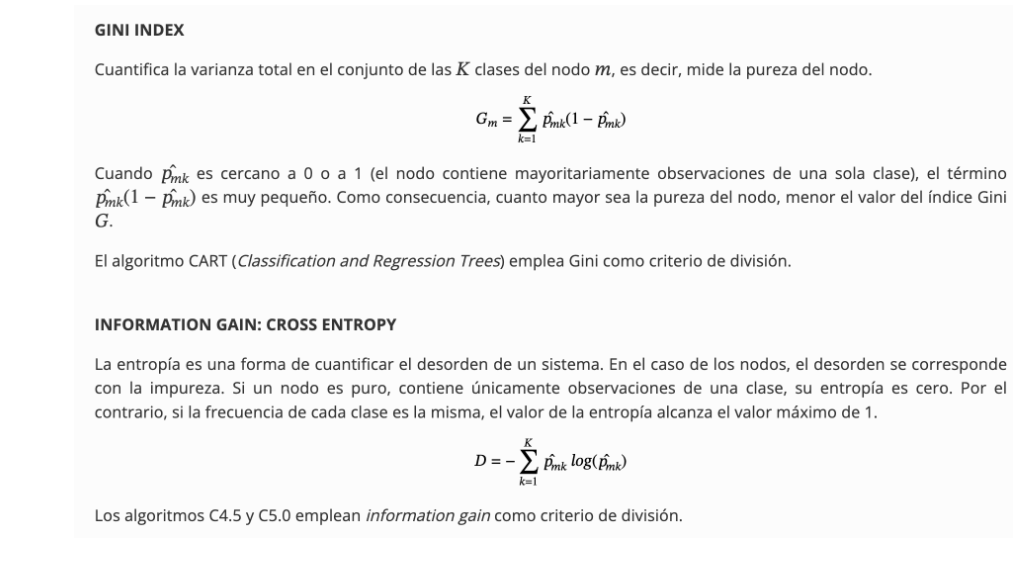

In [64]:
Arbol_Simple.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

criterion: Especifica la función para medir la calidad de una división. Puede ser "gini" para medir la impureza de Gini o "entropy" para medir la ganancia de información. El valor predeterminado es "gini".

max_depth: Controla la profundidad máxima del árbol. Limitar la profundidad del árbol puede ayudar a prevenir el sobreajuste. Si no se establece, los nodos se expandirán hasta que contengan menos de min_samples_split muestras.

min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno. Este parámetro controla la prevención del sobreajuste estableciendo el límite inferior en el tamaño de la muestra para una división.

min_samples_leaf: El número mínimo de muestras requeridas para estar en un nodo hoja. Controla el tamaño mínimo de las hojas del árbol y también ayuda a prevenir el sobreajuste.

max_features: a cantidad máxima de características a considerar al buscar la mejor división. Puede ser un número entero, un porcentaje o una cadena como "sqrt" o "log2". Esto controla la aleatoriedad y puede mejorar la generalización.

random_state: Controla la aleatoriedad en la construcción del árbol. Proporcionar un valor fijo garantiza reproducibilidad en los resultados.

class_weight: Puede tomar los valores "balanced" o un diccionario que asigne pesos a las clases. Esto puede ser útil cuando las clases están desbalanceadas, ya que asigna más importancia a las clases menos representadas.

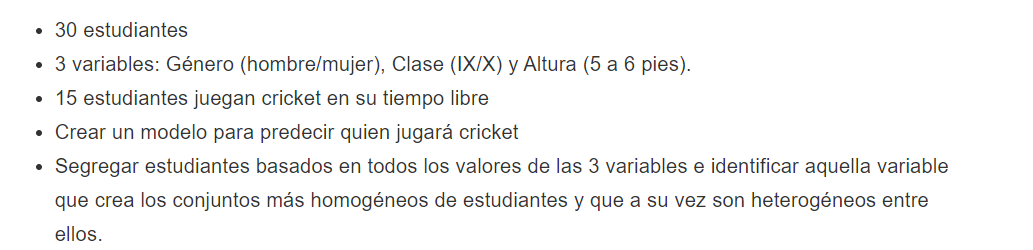ntre

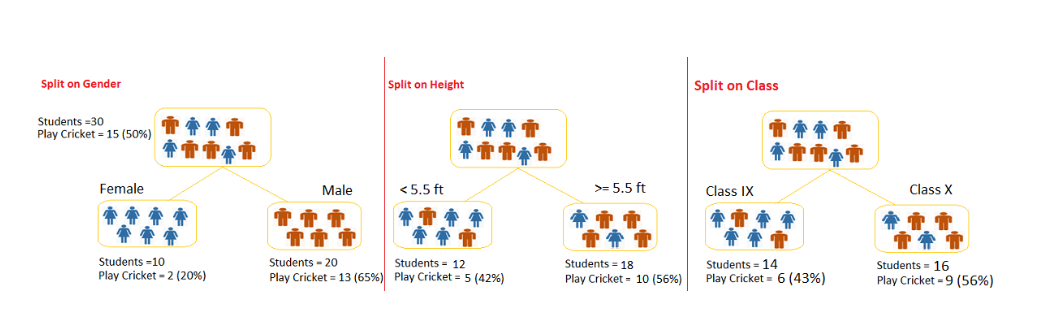

* Calcular Gini para los subnodos usando la fórmula de la suma de los cuadrados de probabilidad para success y failure (p^2 + q^2).

In [65]:
Mujer= (0.20)**2 + (0.80)**2
Hombres=(0.65)**2+(0.35)**2

In [66]:
PonderGenero=(10/30)*Mujer+(20/30)*Hombres
PonderGenero

0.5900000000000001

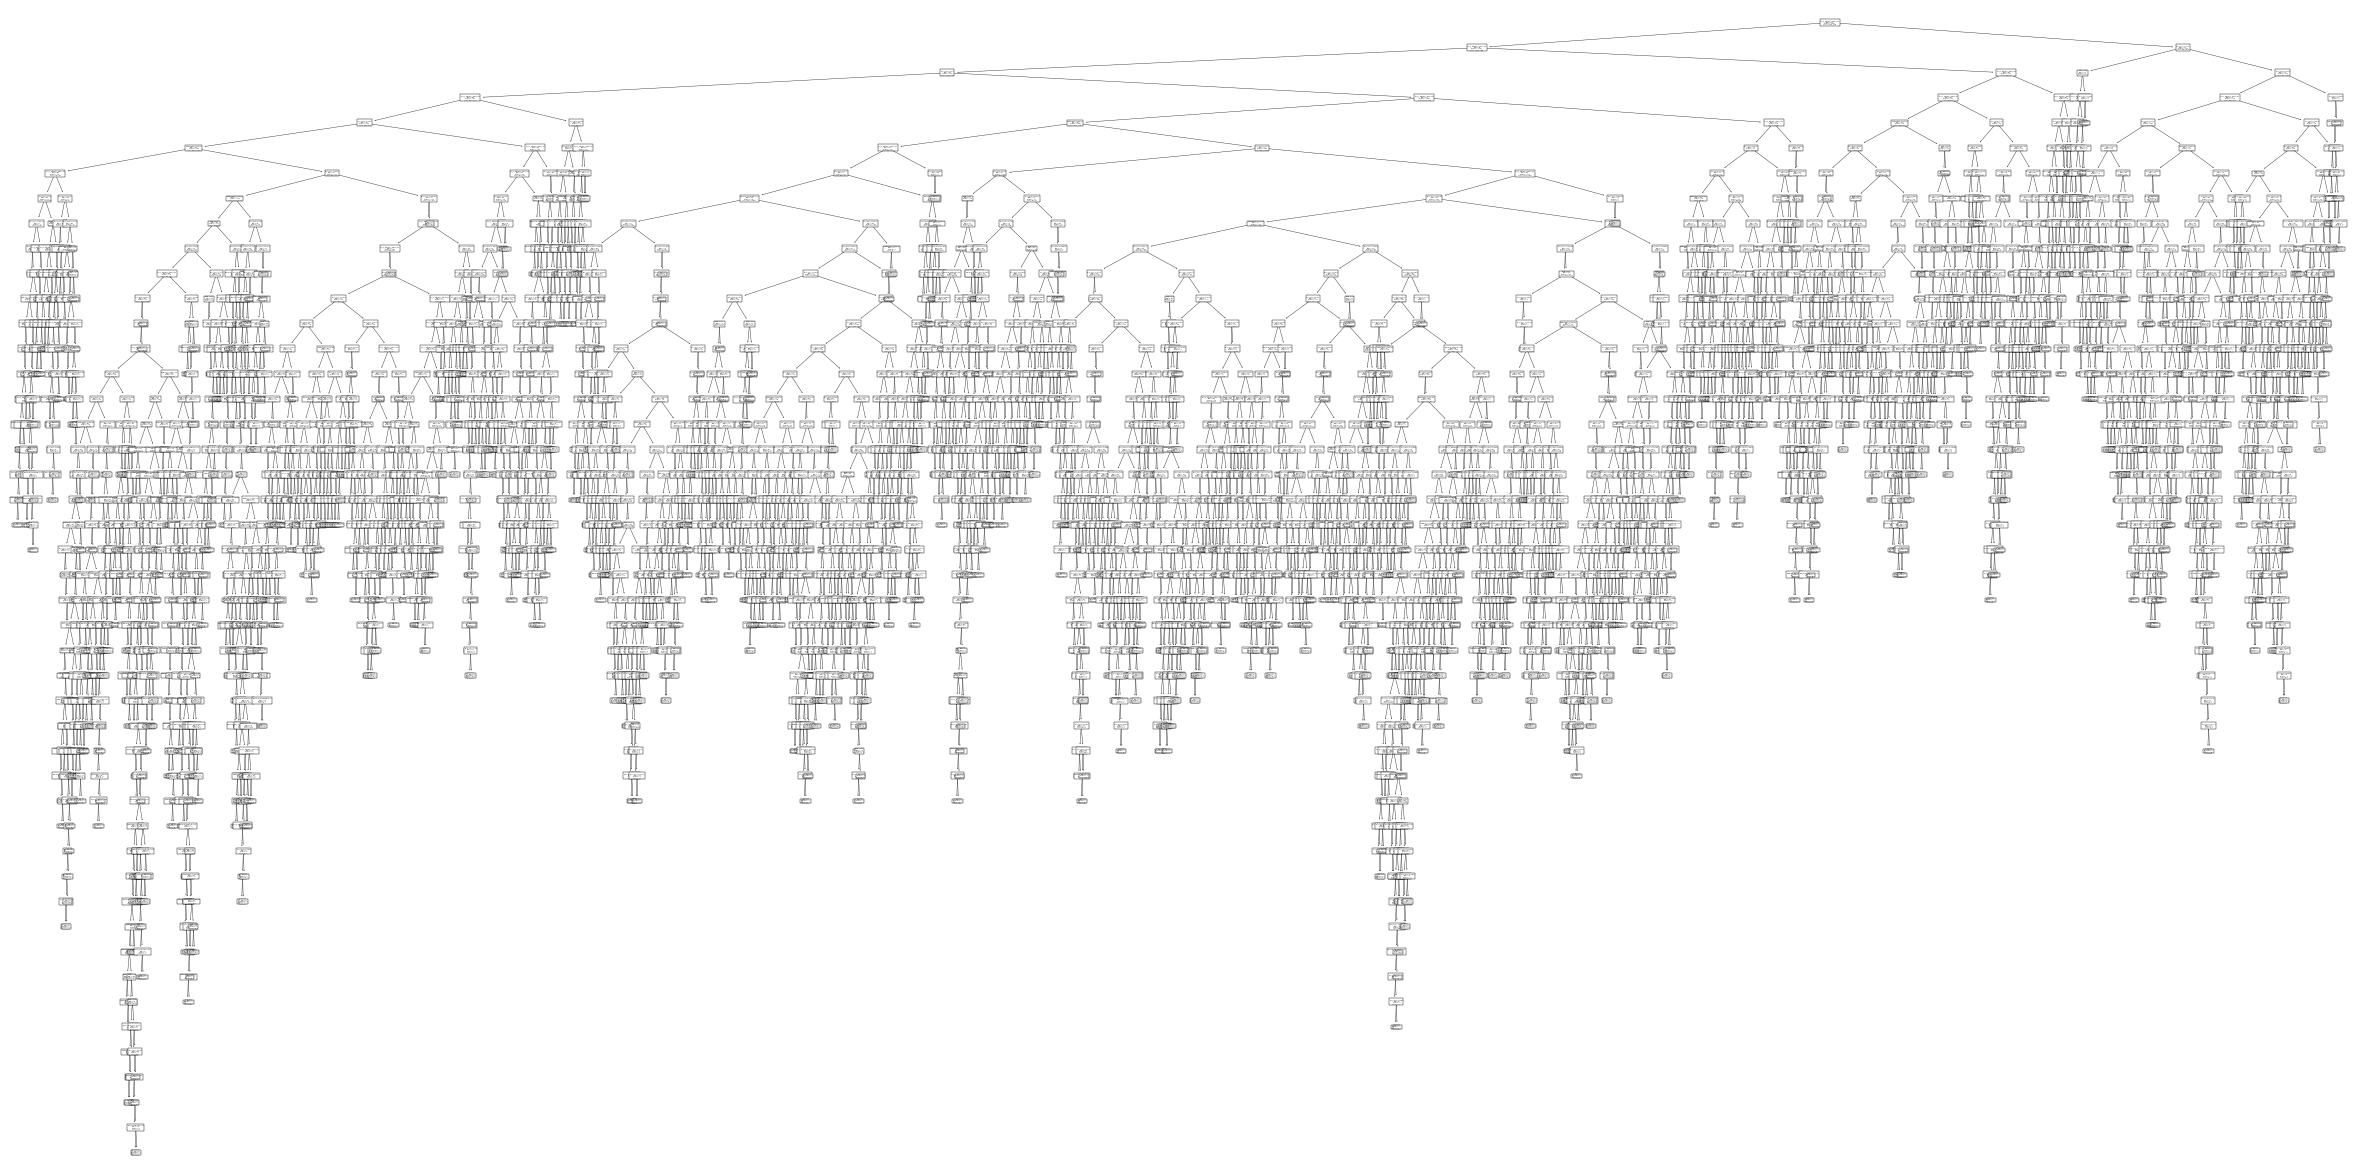

In [67]:
fig, ax= plt.subplots(figsize=(30,15))
plot=plot_tree(decision_tree=Arbol_Simple,
              feature_names=x_train.columns,
              ax=ax)

## **Importancia Variables**

In [68]:
Importancia_Predictores=pd.DataFrame(
{"predictor":x_train.columns,
 "Importancia":Arbol_Simple.feature_importances_})

Importancia_Predictores=Importancia_Predictores.sort_values("Importancia",ascending=False).reset_index(drop=True).head(10)
Importancia_Predictores.head(2)

,predictor,Importancia
0,BILL_AMT1,0.125995
1,PAY_0_Retraso_2_Mes,0.121763


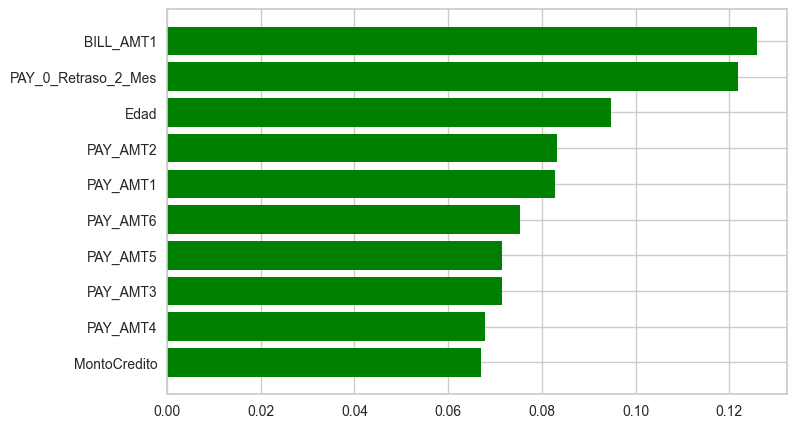

In [69]:
fig, ax= plt.subplots(figsize=(8,5))
ax.barh(Importancia_Predictores.predictor,Importancia_Predictores.Importancia,color="green")
ax.invert_yaxis();

**Evaluar Poder Predictivo Entrenamiento**

Accuracy: 0.9994761904761905
Reporte :               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16355
           1       1.00      1.00      1.00      4645

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



Predicciones,0,1,All
Realidad,,,
0,16354,1,16355
1,10,4635,4645
All,16364,4636,21000


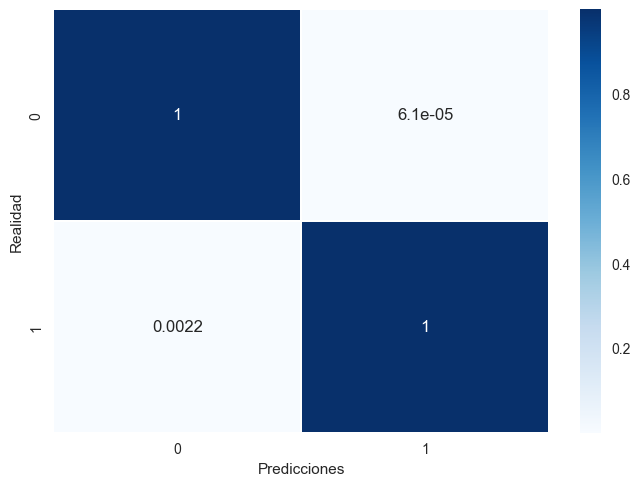

In [70]:
utils.MetricasMatrizConfusion(y=y_train,Modelo=Arbol_Simple,X=x_train,tipo="ML")

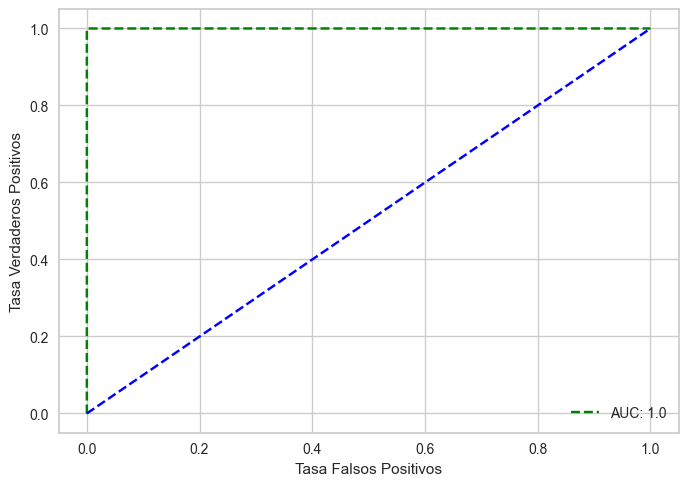

0.9999991707140975

In [71]:
utils.curva_roc(y=y_train,Modelo=Arbol_Simple,X=x_train,tipo="ML")

**Evaluar Poder Predictivo Prueba**

Accuracy: 0.7236666666666667
Reporte :               precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.41      0.40      1991

    accuracy                           0.72      9000
   macro avg       0.61      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000



Predicciones,0,1,All
Realidad,,,
0,5695,1314,7009
1,1173,818,1991
All,6868,2132,9000


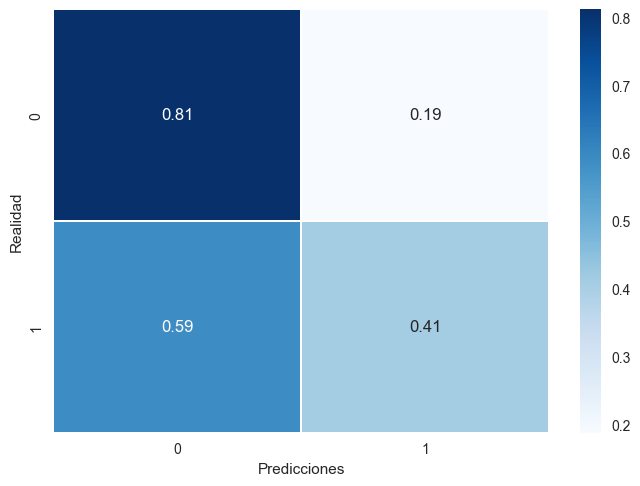

In [72]:
utils.MetricasMatrizConfusion(y=y_test,Modelo=Arbol_Simple,X=x_test,tipo="ML")

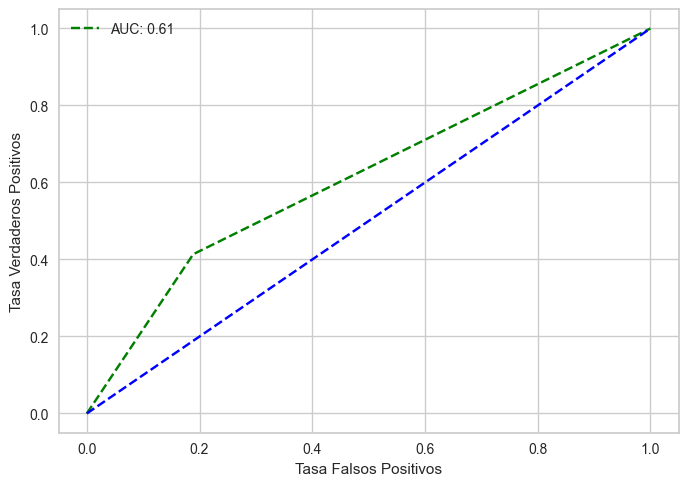

0.6124199287720695

In [73]:
utils.curva_roc(y=y_test,Modelo=Arbol_Simple,X=x_test,tipo="ML")

* Overfitting:  error train < error test
*  Underfitting: error train > error test
*  Ideal = error train similares error test

## **Optimización de Hiperparámetros con K-fold Cross Validation**

In [74]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [75]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 5, 7],
    "min_samples_split": [2, 4, 5, 7],
    "min_samples_leaf": [2, 4, 7],
    "class_weight": [None, "balanced"]
}

In [76]:
from itertools import product

In [77]:
num_models = len(list(product(*param_grid.values())))
print("Número total de modelos:", num_models)

Número total de modelos: 192


In [78]:
192*5

960

In [79]:
grid_search=GridSearchCV(Arbol_Simple,param_grid,cv=5,scoring="roc_auc")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 7],
                         'min_samples_leaf': [2, 4, 7],
                         'min_samples_split': [2, 4, 5, 7]},
             scoring='roc_auc')

In [80]:
best_params= grid_search.best_params_

In [81]:
best_params

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [82]:
best_model=DecisionTreeClassifier(max_depth=5,min_samples_leaf=7,min_samples_split=2,criterion="entropy")

In [83]:
best_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

In [84]:
clases=best_model.classes_
clases_names=["0","1"]

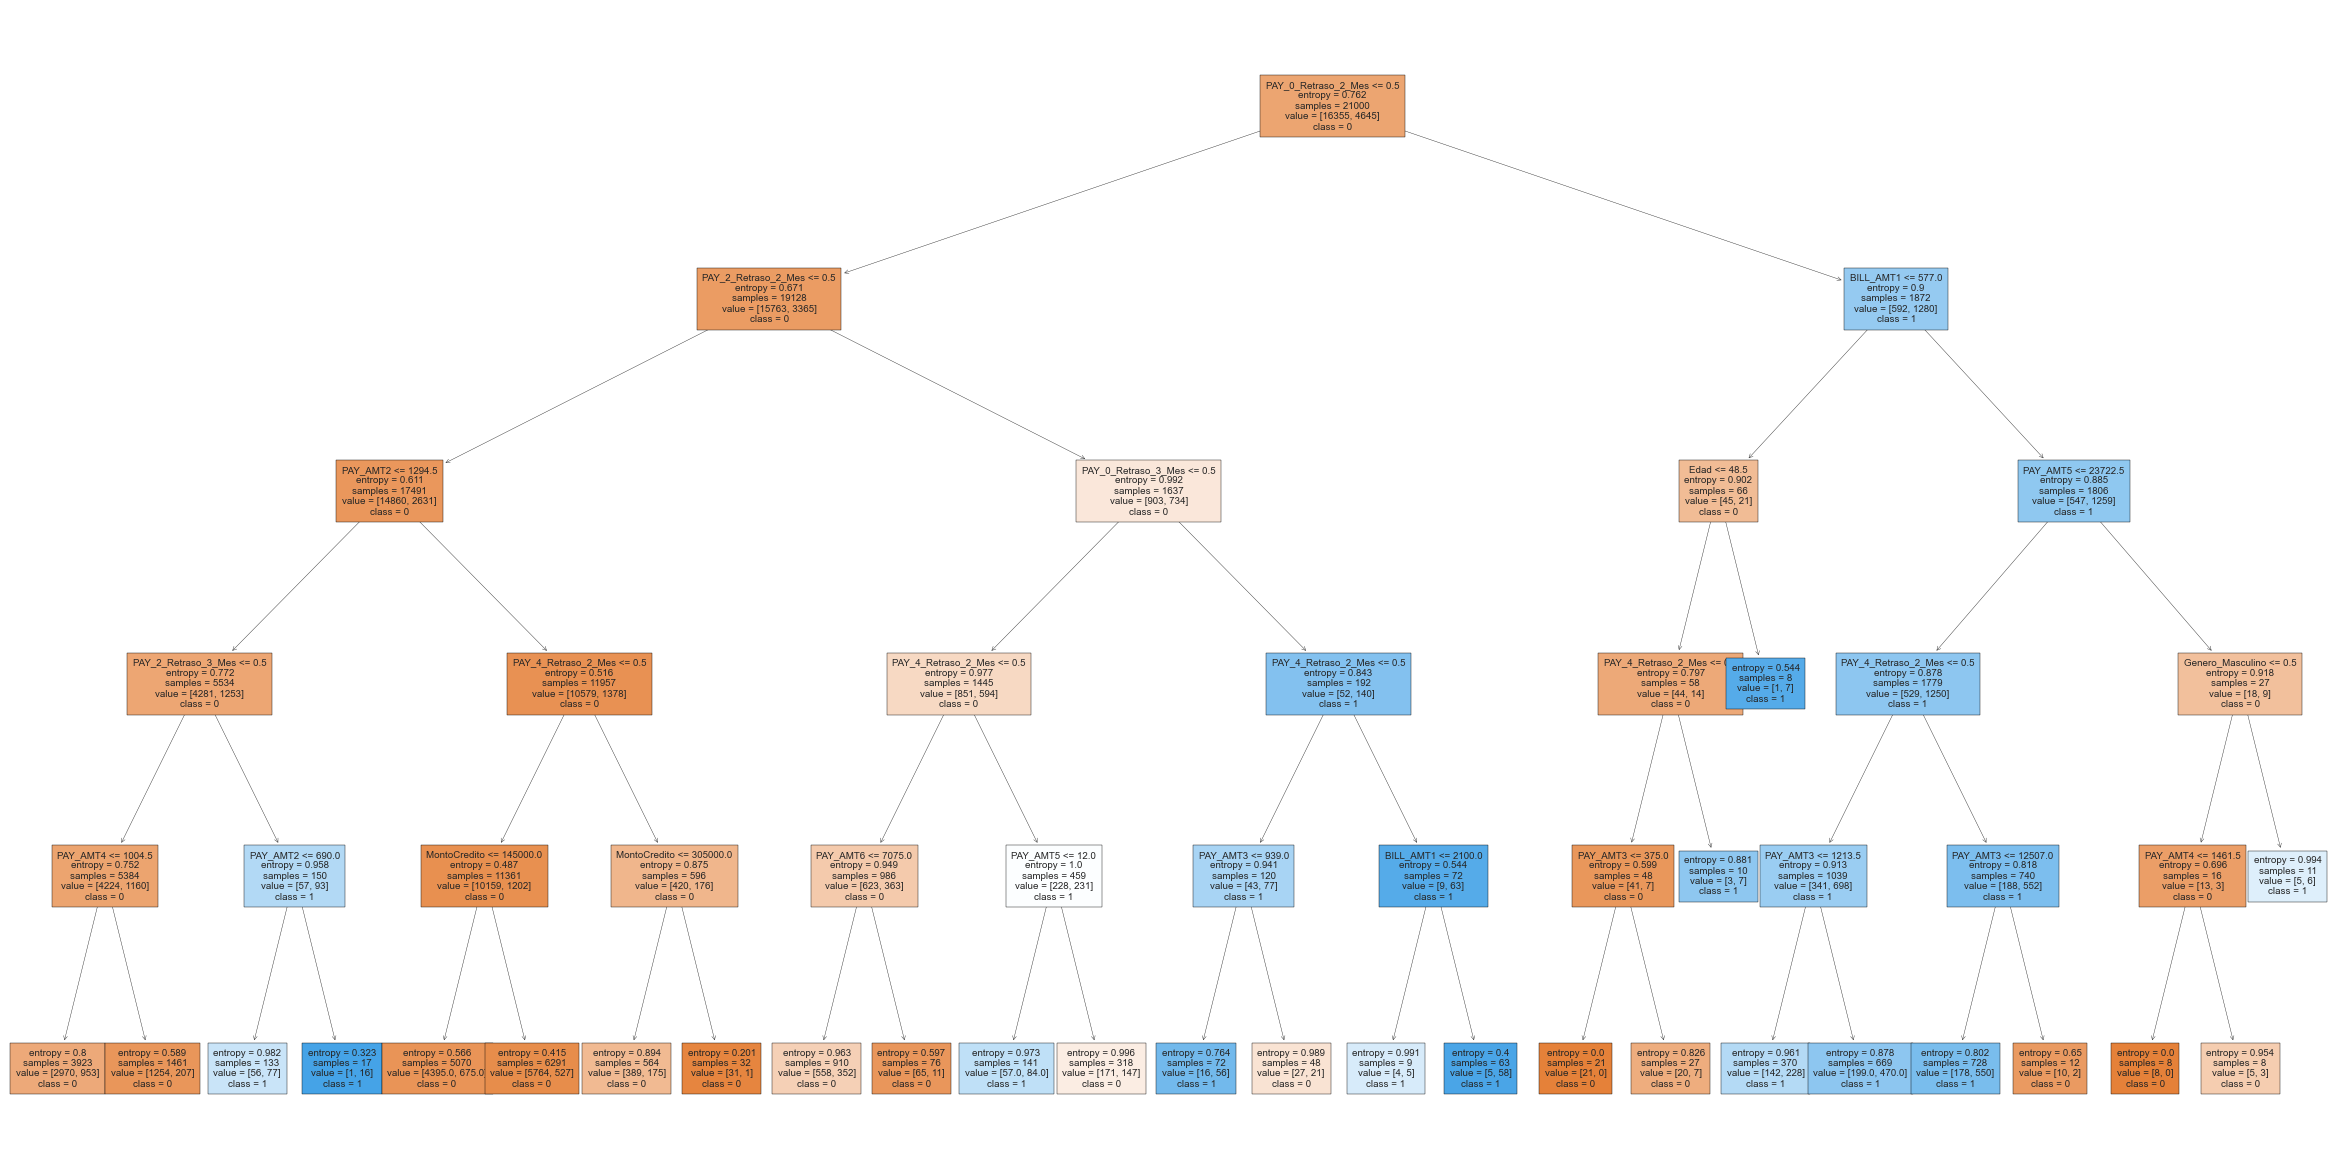

In [85]:
fig, ax= plt.subplots(figsize=(30,15))
plot=plot_tree(decision_tree=best_model,
              feature_names=x_train.columns,
              class_names=clases_names,
               filled=True,
               fontsize=7,
              ax=ax)
plt.savefig("Arbol.png")

In [86]:
# Obtener las reglas y el número de muestras en cada nodo hoja, con la clase predicha
rules = utils.extract_rules_with_class(best_model, x_train.columns, y_train)
#rules 

In [87]:
# Crear un DataFrame para visualizar las reglas y el porcentaje de muestras
total_samples = sum([n_samples for rule, n_samples, _ in rules])
rules_df = pd.DataFrame(rules, columns=['Rule', 'Number of Samples', 'Class'])

# Calcular el porcentaje de muestras
rules_df['Percentage of Total'] = (rules_df['Number of Samples'] / total_samples) * 100

In [88]:
pd.set_option('display.max_colwidth', None)
rules_df

,Rule,Number of Samples,Class,Percentage of Total
0,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 <= 1294.50 AND PAY_2_Retraso_3_Mes <= 0.50 AND PAY_AMT4 <= 1004.50,3923,0,18.680952
1,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 <= 1294.50 AND PAY_2_Retraso_3_Mes <= 0.50 AND PAY_AMT4 > 1004.50,1461,0,6.957143
2,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 <= 1294.50 AND PAY_2_Retraso_3_Mes > 0.50 AND PAY_AMT2 <= 690.00,133,1,0.633333
3,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 <= 1294.50 AND PAY_2_Retraso_3_Mes > 0.50 AND PAY_AMT2 > 690.00,17,1,0.080952
4,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 > 1294.50 AND PAY_4_Retraso_2_Mes <= 0.50 AND MontoCredito <= 145000.00,5070,0,24.142857
5,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 > 1294.50 AND PAY_4_Retraso_2_Mes <= 0.50 AND MontoCredito > 145000.00,6291,0,29.957143
6,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 > 1294.50 AND PAY_4_Retraso_2_Mes > 0.50 AND MontoCredito <= 305000.00,564,0,2.685714
7,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes <= 0.50 AND PAY_AMT2 > 1294.50 AND PAY_4_Retraso_2_Mes > 0.50 AND MontoCredito > 305000.00,32,0,0.152381
8,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes > 0.50 AND PAY_0_Retraso_3_Mes <= 0.50 AND PAY_4_Retraso_2_Mes <= 0.50 AND PAY_AMT6 <= 7075.00,910,0,4.333333
9,PAY_0_Retraso_2_Mes <= 0.50 AND PAY_2_Retraso_2_Mes > 0.50 AND PAY_0_Retraso_3_Mes <= 0.50 AND PAY_4_Retraso_2_Mes <= 0.50 AND PAY_AMT6 > 7075.00,76,0,0.361905


Accuracy: 0.8215238095238095
Reporte :               precision    recall  f1-score   support

           0       0.84      0.96      0.89     16355
           1       0.70      0.34      0.45      4645

    accuracy                           0.82     21000
   macro avg       0.77      0.65      0.67     21000
weighted avg       0.81      0.82      0.80     21000



Predicciones,0,1,All
Realidad,,,
0,15688,667,16355
1,3081,1564,4645
All,18769,2231,21000


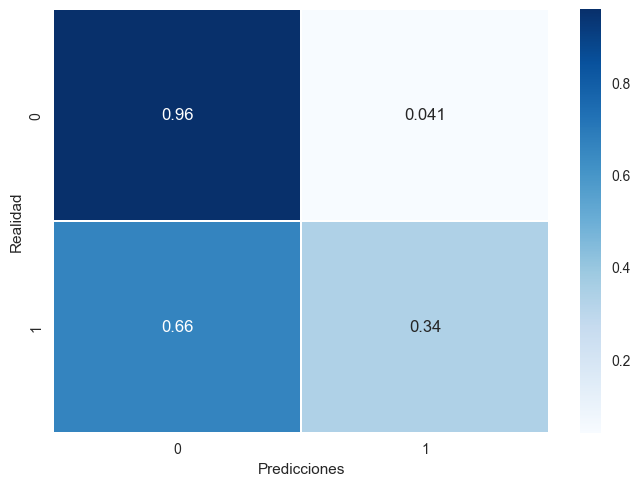

In [89]:
utils.MetricasMatrizConfusion(y=y_train,Modelo=best_model,X=x_train,tipo="ML")

Accuracy: 0.8203333333333334
Reporte :               precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.70      0.33      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



Predicciones,0,1,All
Realidad,,,
0,6729,280,7009
1,1337,654,1991
All,8066,934,9000


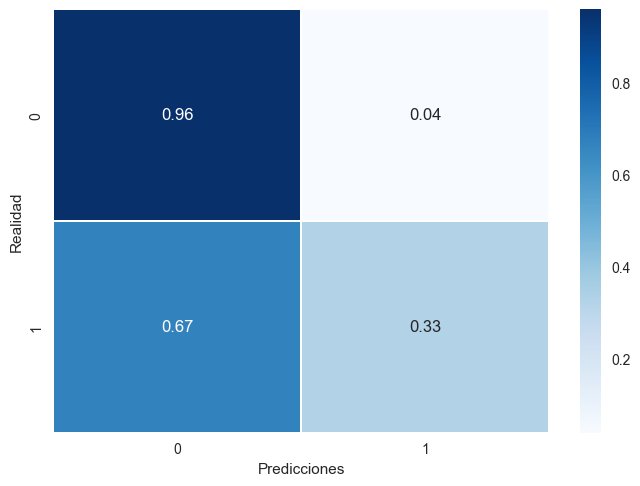

In [90]:
utils.MetricasMatrizConfusion(y=y_test,Modelo=best_model,X=x_test,tipo="ML")

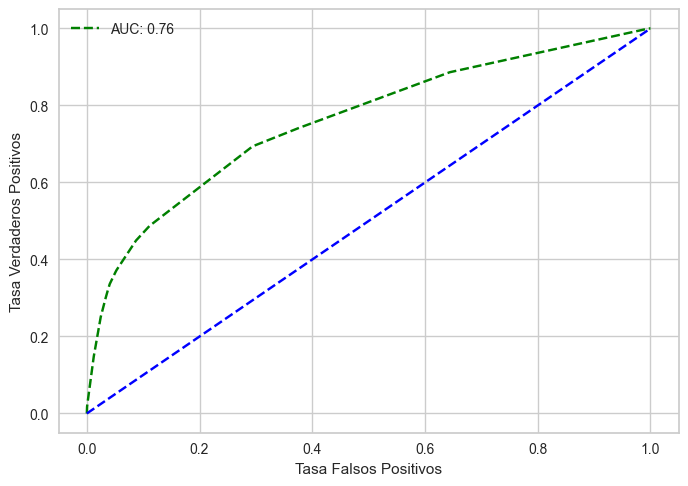

0.7587140474121179

In [91]:
utils.curva_roc(y=y_train,Modelo=best_model,X=x_train,tipo="ML")

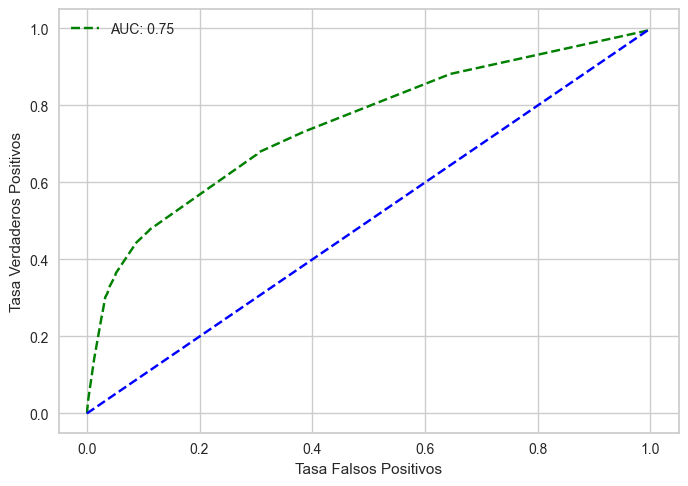

0.748402588363286

In [92]:
utils.curva_roc(y=y_test,Modelo=best_model,X=x_test,tipo="ML")

## **Pycaret**

In [93]:
from pycaret.classification import *

In [94]:
pycaret_train=pd.concat([x_train,y_train],axis=1)
pycaret_test=pd.concat([x_test,y_test],axis=1)

In [95]:
#Model=setup(data=pycaret_train,test_data=pycaret_test,target="Mora",session_id=123,fix_imbalance=True)

In [96]:
#models_to_compare=["rf",'lightgbm','xgboost',"dt","catboost","gbc","lr"]

In [97]:
#best_model=compare_models(include=models_to_compare,fold=5,sort="AUC")

In [98]:
#plot_model(best_model, plot = 'auc')

In [99]:
#best_model=create_model("gbc")

In [100]:
#best_model

In [101]:
#plot_model(best_model,plot="learning")

In [102]:
#plot_model(best_model,plot="feature")

## **La optimización bayesiana**
La optimización bayesiana es un enfoque de optimización que se basa en la inferencia bayesiana y la probabilidad para encontrar la configuración óptima de parámetros de un sistema o función objetivo desconocida. Este enfoque es particularmente útil cuando la evaluación de la función objetivo es costosa o requiere mucho tiempo.

La idea fundamental detrás de la optimización bayesiana es construir un modelo probabilístico de la función objetivo y utilizar este modelo para guiar la búsqueda de la configuración óptima de los parámetros. A medida que se evalúan diferentes configuraciones, el modelo se actualiza con la nueva información, lo que mejora gradualmente la calidad de las predicciones y la búsqueda de la configuración óptima.

In [103]:
#tuned_best_model=tune_model(best_model,search_library="scikit-optimize",return_train_score=True,
 #                         fold=5,choose_better=True,optimize="AUC",n_iter=10) # Minimo colcocar 50 Iteraciones

In [104]:
#tuned_best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.07828346437247728, loss='log_loss',
                           max_depth=5, max_features=0.45248175211564123,
                           max_leaf_nodes=None,
                           min_impurity_decrease=1.075612313068924e-05,
                           min_samples_leaf=4, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=122,
                           n_iter_no_change=None, random_state=123,
                           subsample=0.8139928026389258, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## **Gradient Boosting Classifier**
Gradient Boosting es un método de ensamble que construye el modelo de manera aditiva, es decir, combina varios modelos base (generalmente árboles de decisión) para crear un modelo más fuerte. La idea principal es corregir los errores del modelo previo en cada paso.


* Modelo Inicial: Comienza con un modelo base sencillo, como un árbol de decisión pequeño.
* Residuos: Calcula los errores (residuos) del modelo actual.
* Modelo de Residuos: Entrena un nuevo modelo para predecir estos residuos.
* Actualización del Modelo: El nuevo modelo se añade al modelo conjunto, ajustando sus predicciones para reducir los errores.
* Iteración: Este proceso se repite iterativamente, cada vez ajustando y mejorando el modelo.elo.

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
#from xgboost import XGBClassifier

In [107]:
ModeloFinal = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.07828346437247728, loss='log_loss',
                           max_depth=5, max_features=0.45248175211564123,
                           max_leaf_nodes=None,
                           min_impurity_decrease=1.075612313068924e-05,
                           min_samples_leaf=4, min_samples_split=3,
                           min_weight_fraction_leaf=0.0, n_estimators=122,
                           n_iter_no_change=None, random_state=123,
                           subsample=0.8139928026389258, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
ModeloFinal.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.07828346437247728, max_depth=5,
                           max_features=0.45248175211564123,
                           min_impurity_decrease=1.075612313068924e-05,
                           min_samples_leaf=4, min_samples_split=3,
                           n_estimators=122, random_state=123,
                           subsample=0.8139928026389258)

Accuracy: 0.8398095238095238
Reporte :               precision    recall  f1-score   support

           0       0.85      0.96      0.90     16355
           1       0.76      0.40      0.52      4645

    accuracy                           0.84     21000
   macro avg       0.81      0.68      0.71     21000
weighted avg       0.83      0.84      0.82     21000



Predicciones,0,1,All
Realidad,,,
0,15777,578,16355
1,2786,1859,4645
All,18563,2437,21000


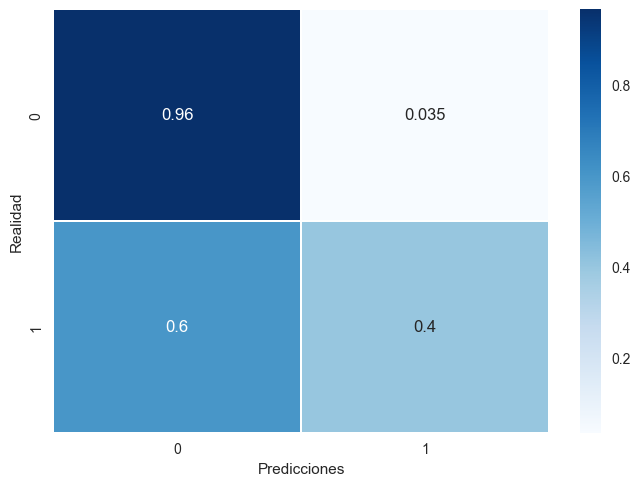

In [109]:
utils.MetricasMatrizConfusion(y=y_train,Modelo=ModeloFinal,X=x_train,tipo="ML")

Accuracy: 0.8202222222222222
Reporte :               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.68      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



Predicciones,0,1,All
Realidad,,,
0,6668,341,7009
1,1277,714,1991
All,7945,1055,9000


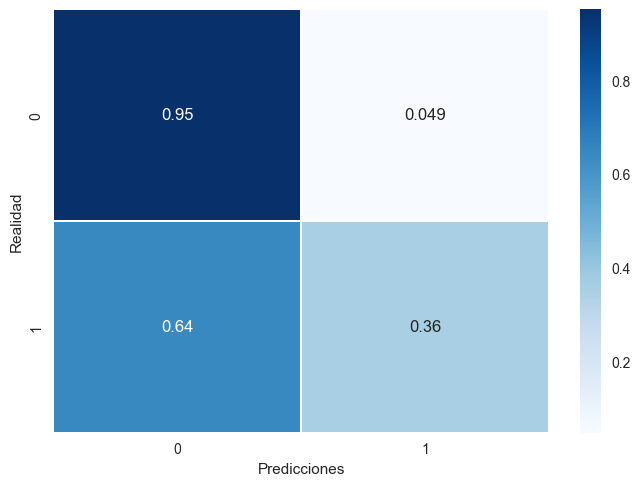

In [110]:
utils.MetricasMatrizConfusion(y=y_test,Modelo=ModeloFinal,X=x_test,tipo="ML")

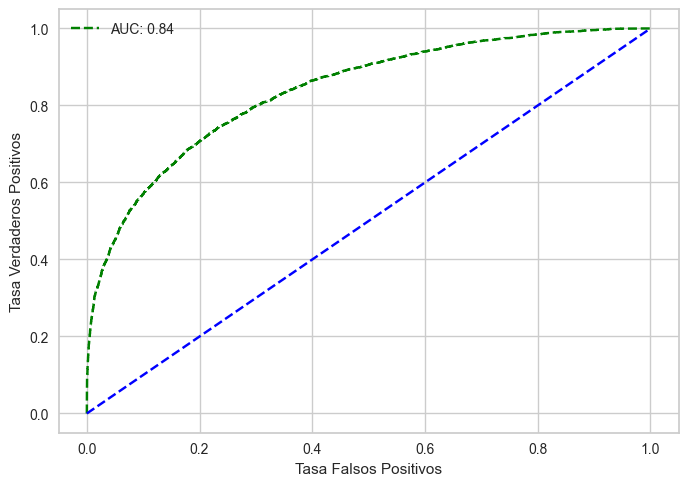

0.838859119791994

In [111]:
utils.curva_roc(y=y_train,Modelo=ModeloFinal,X=x_train,tipo="ML")

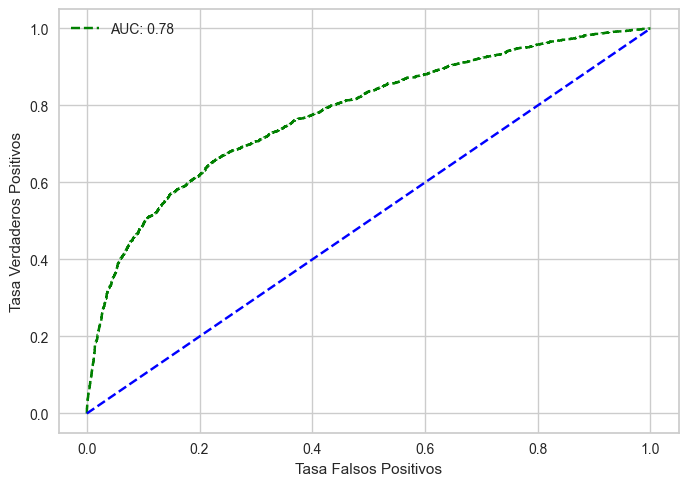

0.7782296335793852

In [112]:
utils.curva_roc(y=y_test,Modelo=ModeloFinal,X=x_test,tipo="ML")

## **Red Neuronal**

Un tensor es una estructura matemática que generaliza los conceptos de escalares, vectores y matrices a dimensiones superiores. Es una herramienta fundamental en muchas áreas de las matemáticas y la física, y es especialmente importante en el campo del aprendizaje automático y la inteligencia artificial.

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [114]:
encoder= LabelEncoder()

In [115]:
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [116]:
y_train_encoded

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [117]:
y_test_encoded

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [118]:
x_train

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
14451,20000.000000,390.000000,780.000000,780.000000,780.000000,390.000000,780.000000,2912.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
18392,230000.000000,237.000000,586.000000,1249.000000,12511.000000,0.000000,0.000000,160.000000,24.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
24955,360000.000000,238.000000,0.000000,200.000000,3730.000000,0.000000,0.000000,0.000000,31.000000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
7162,90000.000000,5000.000000,4300.000000,3500.000000,3500.000000,3700.000000,3100.000000,89947.000000,26.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12125,20000.000000,0.000000,1118.000000,694.000000,412.000000,0.000000,300.000000,6345.000000,29.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,280000.000000,0.000000,8000.000000,5000.000000,6000.000000,10000.000000,5000.000000,238094.000000,40.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3228,50000.000000,2228.000000,2500.000000,1457.000000,1660.000000,1300.000000,1340.000000,43721.000000,26.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
23477,100000.000000,0.000000,1850.000000,1500.000000,3200.000000,0.000000,1500.000000,31708.000000,30.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
22177,310000.000000,1261.000000,1261.000000,0.000000,1651.000000,390.000000,390.000000,1261.000000,27.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


La estandarización y la normalización de variables son técnicas de preprocesamiento de datos utilizadas para transformar las características de un conjunto de datos para que estén en una escala comparable. Estas técnicas son cruciales para mejorar el rendimiento y la estabilidad de muchos algoritmos de aprendizaje automático.

In [119]:
# Normalización de datos# Normalización de datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [120]:
#pd.DataFrame(X_train_scaled)

In [121]:
X_train_scaled.shape[1]

39

In [122]:
X_train_scaled.shape[0]-1

20999

**Definición del modelo**

## **La capa de Dropout**

Es una técnica de regularización utilizada en modelos de redes neuronales para prevenir el sobreajuste (overfitting). El sobreajuste ocurre cuando un modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. La capa de Dropout aborda este problema apagando aleatoriamente un conjunto fraccionario de unidades de la red durante el entrenamiento, lo que significa que estas unidades no contribuirán a la propagación hacia adelante ni a la propagación hacia atrás durante una iteración específica del entrenamiento

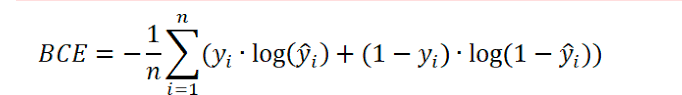

In [123]:
model = Sequential()
## Capa de Entrada
model.add(Dense(80,input_dim=X_train_scaled.shape[1],activation="relu"))
## Regulización
model.add(Dropout(0.2)) # Capa de Dropout
## Capas Ocultas
model.add(Dense(40,activation="relu"))
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(20,activation="relu"))
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(10,activation="relu"))
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(5,activation="relu"))
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(2,activation="relu"))
model.add(Dropout(0.2)) # Capa de Dropout
model.add(Dense(1,activation="sigmoid")) # capa de salida

In [124]:
#Compilación del modelo
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['AUC'])

In [125]:
## Entrenamiento
model.fit(X_train_scaled,y_train_encoded,validation_split=0.2,epochs=2)

Epoch 1/2
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.4968 - loss: 0.5759 - val_AUC: 0.5000 - val_loss: 0.5301
Epoch 2/2
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4956 - loss: 0.5311 - val_AUC: 0.5000 - val_loss: 0.5300


**Evaluar Error**

In [126]:
probabilidades_train=model.predict(X_train_scaled)
probabilidades_train

657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.21728984],
       [0.21728984],
       [0.21728984],
       ...,
       [0.21728984],
       [0.21728984],
       [0.21728984]], dtype=float32)

In [127]:
PrediccionesTrain=np.where(probabilidades_train<0.5,0,1)
PrediccionesTrain

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [128]:
ReporteTrain=metrics.classification_report(y_train,PrediccionesTrain)
print(ReporteTrain)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     16355
           1       0.00      0.00      0.00      4645

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.61      0.78      0.68     21000



0.5


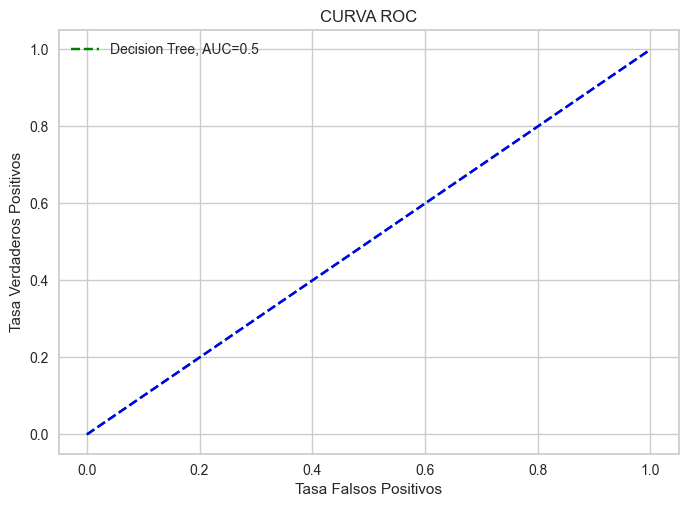

In [129]:
fpr, tpr, thresholds = roc_curve(y_train, probabilidades_train[:,0])
AUC_RN=round(roc_auc_score(y_train,  probabilidades_train[:,0]),2)
print(AUC_RN)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_RN))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

In [130]:
probabilidades_test=model.predict(X_test_scaled)
probabilidades_test

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.21728984],
       [0.21728984],
       [0.21728984],
       ...,
       [0.21728984],
       [0.21728984],
       [0.21728984]], dtype=float32)

In [131]:
PrediccionesTest=np.where(probabilidades_test<0.5,0,1)
PrediccionesTest

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [132]:
ReporteTrain=metrics.classification_report(y_test,PrediccionesTest)
print(ReporteTrain)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



0.5


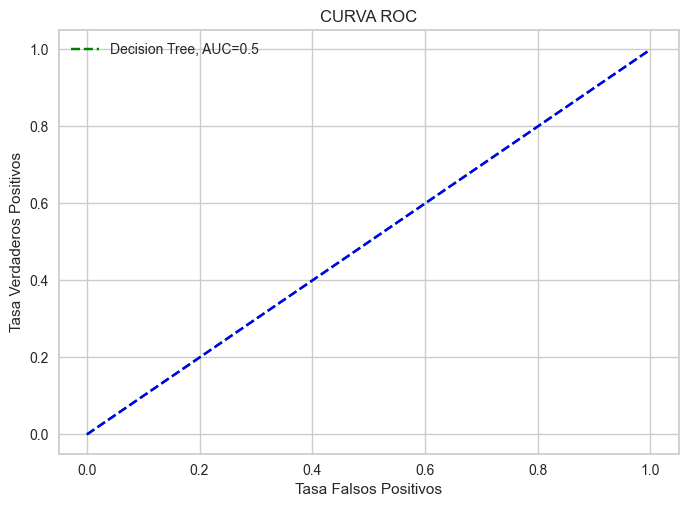

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, probabilidades_test[:,0])
AUC_RN=round(roc_auc_score(y_test,  probabilidades_test[:,0]),2)
print(AUC_RN)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC_RN))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

# **Ordenar por Deciles (Calibrar Modelos)**

In [134]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

In [135]:
ModeloFinal

GradientBoostingClassifier(learning_rate=0.07828346437247728, max_depth=5,
                           max_features=0.45248175211564123,
                           min_impurity_decrease=1.075612313068924e-05,
                           min_samples_leaf=4, min_samples_split=3,
                           n_estimators=122, random_state=123,
                           subsample=0.8139928026389258)

In [136]:
predicciones  =ModeloFinal.predict_proba(X = x_test)
prob_positivo = predicciones[:, 1]

In [137]:
predicciones

array([[0.74798605, 0.25201395],
       [0.92348327, 0.07651673],
       [0.86760952, 0.13239048],
       ...,
       [0.85569591, 0.14430409],
       [0.21707   , 0.78293   ],
       [0.54206532, 0.45793468]])

In [138]:
fraccion_positivos, media_prob_predicha = calibration_curve(y_test, prob_positivo, n_bins=20)

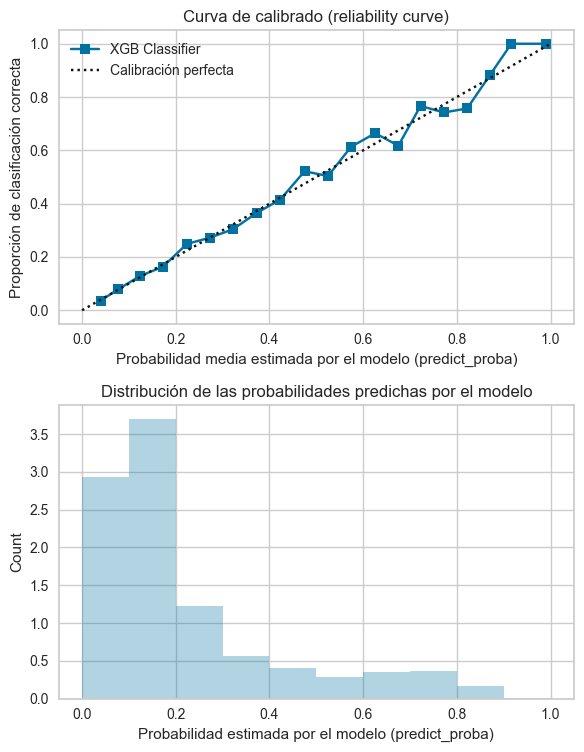

In [139]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(media_prob_predicha, fraccion_positivos, "s-", label="XGB Classifier")
axs[0].plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
axs[0].set_ylabel("Proporción de clasificación correcta")
axs[0].set_xlabel("Probabilidad media estimada por el modelo (predict_proba)")
axs[0].set_title('Curva de calibrado (reliability curve)')
axs[0].legend()

axs[1].hist(prob_positivo, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Probabilidad estimada por el modelo (predict_proba)")
axs[1].set_ylabel("Count")
axs[1].set_title('Distribución de las probabilidades predichas por el modelo')

plt.tight_layout()
plt.show();

## **Modelo clasificación calibrado**

La calibración de modelos en scikitlearn esta implementada de forma que, el objeto final, contiene tanto el modelo principal como el modelo de calibración. Esto permite que al aplicar el método .predic() los resultados ya estén corregidos.

In [140]:
modelo_calibrado = CalibratedClassifierCV(ModeloFinal, cv=3, method='sigmoid')
modelo_calibrado.fit(x_train,y_train)

CalibratedClassifierCV(cv=3,
                       estimator=GradientBoostingClassifier(learning_rate=0.07828346437247728,
                                                            max_depth=5,
                                                            max_features=0.45248175211564123,
                                                            min_impurity_decrease=1.075612313068924e-05,
                                                            min_samples_leaf=4,
                                                            min_samples_split=3,
                                                            n_estimators=122,
                                                            random_state=123,
                                                            subsample=0.8139928026389258))

In [142]:
# Predicción con probabilidades calibradas
# ==============================================================================
predicciones  = modelo_calibrado.predict_proba(X = x_test)
# Se extraen las probabilidades de la clase positiva
prob_positivo = predicciones[:, 1]

In [143]:
fraccion_positivos, media_prob_predicha = calibration_curve(y_test, prob_positivo, n_bins=20)

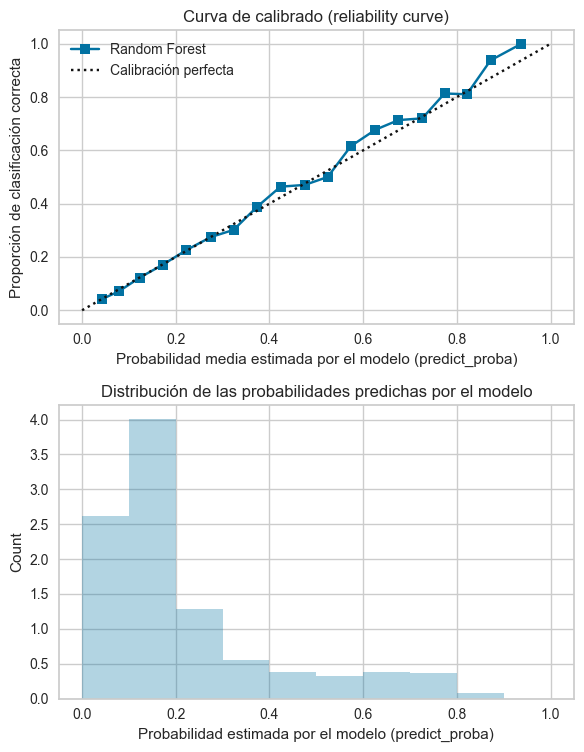

In [144]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(media_prob_predicha, fraccion_positivos, "s-", label="Random Forest")
axs[0].plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
axs[0].set_ylabel("Proporción de clasificación correcta")
axs[0].set_xlabel("Probabilidad media estimada por el modelo (predict_proba)")
axs[0].set_title('Curva de calibrado (reliability curve)')
axs[0].legend()

axs[1].hist(prob_positivo, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Probabilidad estimada por el modelo (predict_proba)")
axs[1].set_ylabel("Count")
axs[1].set_title('Distribución de las probabilidades predichas por el modelo')

plt.tight_layout()
plt.show();

In [145]:
Resultado=x_test.copy()

In [150]:
Resultado.shape

(9000, 40)

In [146]:
Probalilidad=modelo_calibrado.predict_proba(x_test)[:,1]

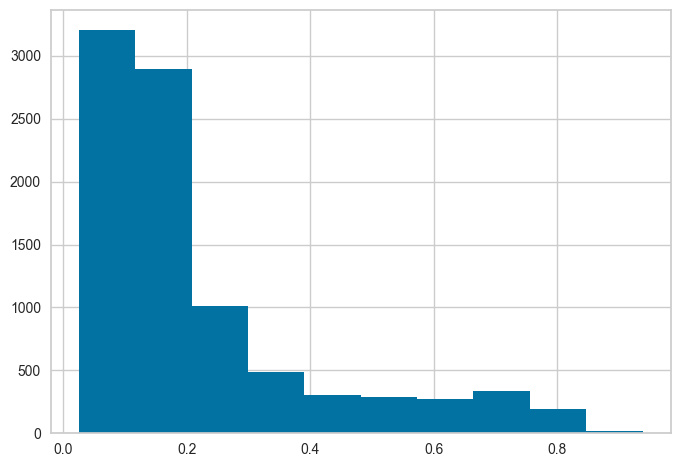

In [147]:
plt.hist(Probalilidad);

In [148]:
Resultado["Score"]=Probalilidad

In [151]:
Resultado["Realidad"]=y_test.values

In [152]:
Resultado

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes,Score,Realidad
45,210000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.251910,1
18762,420000.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,84363.000000,52898.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.090001,0
9341,70000.000000,3400.000000,2310.000000,1600.000000,1600.000000,1700.000000,2000.000000,67306.000000,35.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.134110,0
21814,180000.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.255133,0
25950,410000.000000,388.000000,388.000000,110345.000000,388.000000,8000.000000,4200.000000,388.000000,32.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.135637,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4289,100000.000000,4611.000000,4000.000000,2472.000000,2387.000000,2502.000000,2544.000000,81382.000000,52.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0.128091,0
29076,50000.000000,3006.000000,6152.000000,0.000000,0.000000,0.000000,0.000000,26242.000000,56.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.178047,0
20228,30000.000000,1000.000000,3836.000000,0.000000,0.000000,22525.000000,0.000000,25648.000000,50.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.124465,0
10662,70000.000000,0.000000,1750.000000,4000.000000,4000.000000,2060.000000,2200.000000,45740.000000,40.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.721980,1


In [158]:
data_sorted=Resultado.sort_values(by='Score', ascending=False)

In [156]:
Resultado.shape

(9000, 41)

In [157]:
9000/10

900.0

In [163]:
data_sorted['Decil'] =pd.qcut(data_sorted['Score'], q=10, labels=False)
data_sorted.Realidad=data_sorted.Realidad.astype(int)

In [164]:
data_sorted

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes,Score,Realidad,Decil
360,500000.000000,10000.000000,0.000000,16500.000000,14000.000000,16000.000000,19000.000000,507726.000000,23.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.937841,1,9
24397,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1050.000000,36.000000,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.896310,1,9
18094,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1050.000000,42.000000,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.895014,1,9
6893,370000.000000,0.000000,0.000000,11000.000000,10019.000000,10000.000000,10000.000000,390509.000000,29.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.892434,1,9
24167,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2400.000000,22.000000,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0.879222,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,390000.000000,16008.000000,100000.000000,4000.000000,5000.000000,4000.000000,3000.000000,9918.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.027646,0,0
10406,360000.000000,32038.000000,28982.000000,2233.000000,51379.000000,0.000000,0.000000,12018.000000,29.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.027016,0,0
3736,430000.000000,5873.000000,52983.000000,10203.000000,35002.000000,7500.000000,10000.000000,10226.000000,31.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.026752,0,0
20688,440000.000000,20016.000000,29748.000000,10015.000000,25448.000000,14501.000000,11501.000000,37547.000000,31.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0.025959,0,0


In [165]:
proporcion_morosos = data_sorted.groupby('Decil')['Realidad'].mean()

In [168]:
proporcion_morosos

Decil
0   0.046667
1   0.081111
2   0.088889
3   0.112222
4   0.140000
5   0.148889
6   0.212222
7   0.242222
8   0.424444
9   0.715556
Name: Realidad, dtype: float64

In [169]:
tabla_deciles = data_sorted.groupby('Decil')['Realidad'].mean().reset_index()
tabla_deciles = tabla_deciles.rename(columns={'Realidad': 'Proporción de Morosos'})
tabla_deciles['Proporción de No Morosos'] = 1 - tabla_deciles['Proporción de Morosos']
tabla_deciles = tabla_deciles.sort_values(by='Decil', ascending=True)
tabla_deciles = tabla_deciles.T
tabla_deciles

,0,1,2,3,4,5,6,7,8,9
Decil,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000
Proporción de Morosos,0.046667,0.081111,0.088889,0.112222,0.140000,0.148889,0.212222,0.242222,0.424444,0.715556
Proporción de No Morosos,0.953333,0.918889,0.911111,0.887778,0.860000,0.851111,0.787778,0.757778,0.575556,0.284444


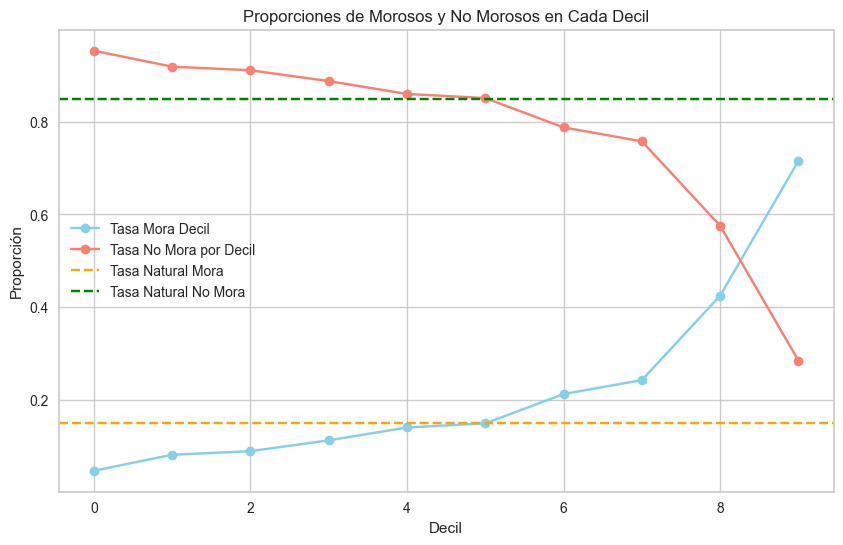

In [170]:
deciles = tabla_deciles.iloc[0]
proporcion_morosos = tabla_deciles.iloc[1]
proporcion_no_morosos = tabla_deciles.iloc[2]

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(deciles, proporcion_morosos, marker='o', color='skyblue', label='Tasa Mora Decil')
ax.plot(deciles, proporcion_no_morosos, marker='o', color='salmon', label='Tasa No Mora por Decil')

# Línea horizontal para el target general de morosos
ax.axhline(y=0.15, color='orange', linestyle='--', label='Tasa Natural Mora')

# Línea horizontal para el target general de no morosos
ax.axhline(y=0.85, color='green', linestyle='--', label='Tasa Natural No Mora')

# Etiquetas y título del gráfico
ax.set_xlabel('Decil')
ax.set_ylabel('Proporción')
ax.set_title('Proporciones de Morosos y No Morosos en Cada Decil')
ax.legend()

# Mostrar el gráfico
plt.show()

In [172]:
y_test.value_counts(normalize=True)

Mora
0   0.778778
1   0.221222
Name: proportion, dtype: float64

*Pueden usar modelos No supervisados para encontrar la cantidad de grupos a segmentar*

In [177]:
def categorizar_riesgo(score):
    if pd.isnull(score):
        return 'Sin Credito'
    elif (score >= 0.50) & (score<0.75)  :
        return 'Riesgo Medio'
    elif score >= 0.75:
        return 'Riesgo Alto'
    else:
        return 'Riesgo Moderado'
Resultado["Segmentacion"]=Resultado['Score'].apply(categorizar_riesgo)

In [181]:
Resultado["Segmentacion"].value_counts(normalize=True)

Segmentacion
Riesgo Moderado   0.885222
Riesgo Medio      0.089778
Riesgo Alto       0.025000
Name: proportion, dtype: float64

In [182]:
Resultado.to_csv("segmentacion_no_pago.csv",index=False)

## **Exportar Modelo Final**

In [183]:
X

,MontoCredito,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT3,PAY_AMT5,PAY_AMT6,BILL_AMT1,Edad,PAY_0_Retraso_2_Mes,PAY_2_Retraso_2_Mes,PAY_3_Retraso_2_Mes,PAY_4_Retraso_2_Mes,PAY_0_Retraso_3_Mes,PAY_0_Retraso_1_Mes,PAY_2_Retraso_3_Mes,PAY_3_Retraso_3_Mes,PAY_4_Retraso_3_Mes,PAY_4_Retraso_7_Mes,PAY_0_Retraso_4_Mes,PAY_4_Retraso_4_Mes,PAY_3_Retraso_4_Mes,PAY_3_Retraso_7_Mes,Educacion_Posgrado,PAY_2_Retraso_4_Mes,Genero_Masculino,Educacion_Secundaria,PAY_2_Retraso_5_Mes,PAY_3_Retraso_6_Mes,PAY_2_Retraso_6_Mes,PAY_4_Retraso_5_Mes,PAY_2_Retraso_7_Mes,PAY_0_Retraso_7_Mes,PAY_3_Retraso_5_Mes,PAY_0_Retraso_8_Mes,EstadoCivil_Soltero,Educacion_Universidad,PAY_0_Retraso_5_Mes,PAY_0_Retraso_6_Mes
0,20000.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,3913.000000,24.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,120000.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,2682.000000,26.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,90000.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,29239.000000,34.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,50000.000000,2000.000000,2019.000000,1100.000000,1200.000000,1069.000000,1000.000000,46990.000000,37.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,50000.000000,2000.000000,36681.000000,9000.000000,10000.000000,689.000000,679.000000,8617.000000,57.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.000000,8500.000000,20000.000000,3047.000000,5003.000000,5000.000000,1000.000000,188948.000000,39.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
29996,150000.000000,1837.000000,3526.000000,129.000000,8998.000000,0.000000,0.000000,1683.000000,43.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
29997,30000.000000,0.000000,0.000000,4200.000000,22000.000000,2000.000000,3100.000000,3565.000000,37.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
29998,80000.000000,85900.000000,3409.000000,1926.000000,1178.000000,52964.000000,1804.000000,-1645.000000,41.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [184]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Mora, Length: 30000, dtype: int64

In [185]:
modelo_calibrado = CalibratedClassifierCV(ModeloFinal, cv=3, method='sigmoid')
modelo_calibrado.fit(X,y)

CalibratedClassifierCV(cv=3,
                       estimator=GradientBoostingClassifier(learning_rate=0.07828346437247728,
                                                            max_depth=5,
                                                            max_features=0.45248175211564123,
                                                            min_impurity_decrease=1.075612313068924e-05,
                                                            min_samples_leaf=4,
                                                            min_samples_split=3,
                                                            n_estimators=122,
                                                            random_state=123,
                                                            subsample=0.8139928026389258))

Accuracy: 0.835
Reporte :               precision    recall  f1-score   support

           0       0.85      0.96      0.90     23364
           1       0.74      0.39      0.51      6636

    accuracy                           0.83     30000
   macro avg       0.80      0.67      0.71     30000
weighted avg       0.82      0.83      0.81     30000



Predicciones,0,1,All
Realidad,,,
0,22475,889,23364
1,4061,2575,6636
All,26536,3464,30000


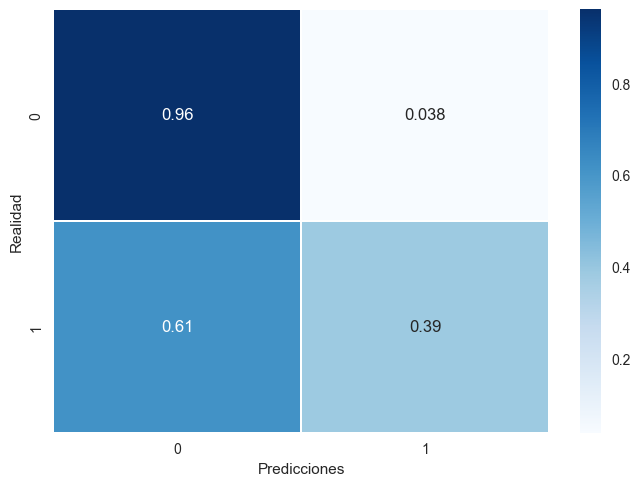

In [188]:
utils.MetricasMatrizConfusion(y=y,Modelo=modelo_calibrado,X=X,tipo="ML")

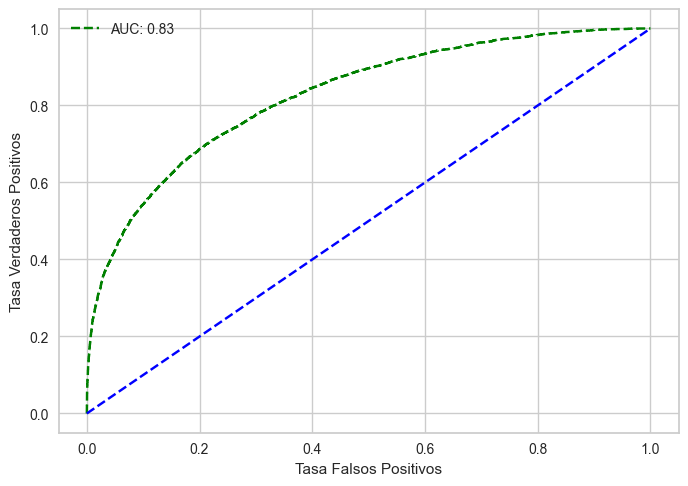

0.82655871219216

In [190]:

utils.curva_roc(y=y,Modelo=modelo_calibrado,X=X,tipo="ML")

In [191]:
import pickle
with open('ModeloFinalCredit.pkl', 'wb') as file:
    pickle.dump(modelo_calibrado, file)

**Interpetación**

HAP (SHapley Additive exPlanations) values son una herramienta en el ámbito del aprendizaje automático (machine learning) que se utiliza para interpretar y explicar los resultados de modelos complejos. Los SHAP values se basan en la teoría de juegos, específicamente en el valor de Shapley, que fue introducido por Lloyd Shapley en 1953.

Aquí tienes un resumen de los conceptos clave:

Valor de Shapley: En la teoría de juegos, el valor de Shapley es una forma de distribuir las ganancias de una coalición de jugadores de manera justa, considerando la contribución individual de cada jugador a la coalición.

SHAP values en machine learning: En el contexto de machine learning, los SHAP values distribuyen la predicción de un modelo entre las características de entrada de una manera justa y consistente. Esto permite entender cuánto contribuye cada característica a una predicción específica.

Consistencia y equidad: Los SHAP values cumplen con propiedades de consistencia y equidad, lo que significa que reflejan fielmente la importancia de cada característica. Si una característica aumenta su contribución a la predicción en todos los modelos, su valor SHAP también debería aumentar.

In [192]:
import shap

In [193]:
pred=ModeloFinal.predict(x_train)

In [194]:
explainer=shap.TreeExplainer(ModeloFinal)

In [195]:
shap_values=explainer.shap_values(x_train)

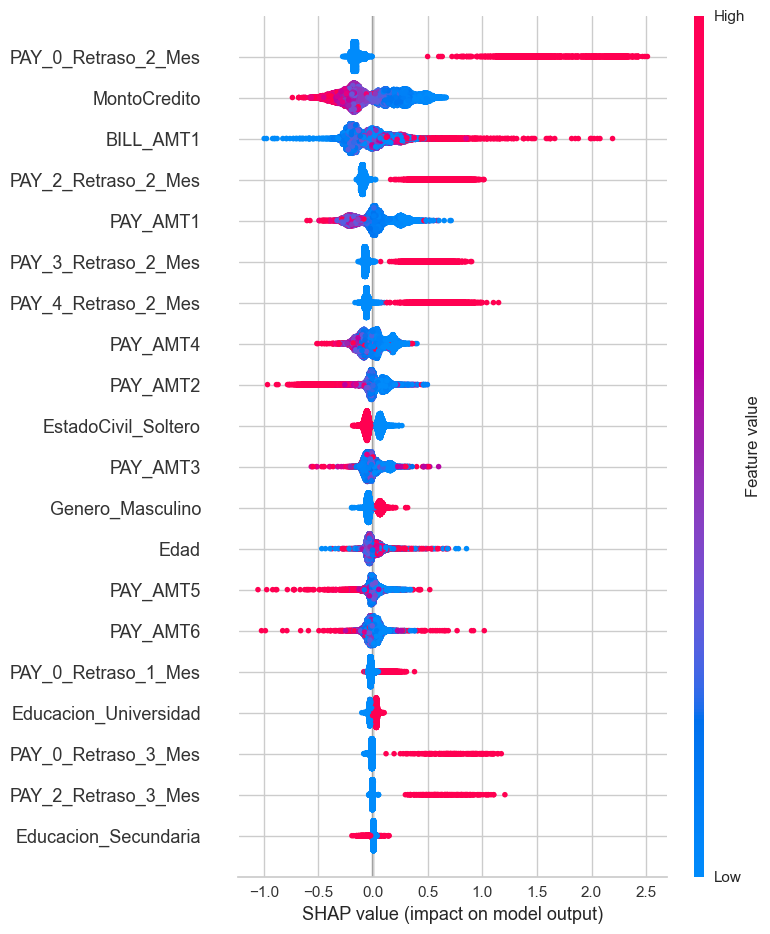

In [196]:
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()
shap.summary_plot(shap_values, x_train)

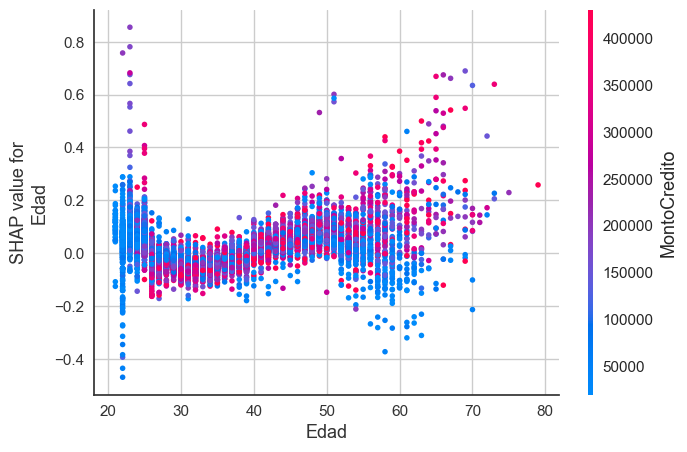

In [200]:
shap.dependence_plot("Edad",shap_values,x_train,interaction_index="MontoCredito")

In [202]:
x_test.to_csv("Nueva.csv",index=False)